In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np
from datetime import datetime
import csv

import os
import glob

import pdb

In [52]:
# Get IR baseline reference time
IR_baseline_reference_time = pd.read_csv('data_cleaning_IR_baseline_reference_time.csv')

# convert reference time to timestamp type
for index, row in IR_baseline_reference_time.iterrows():
    year = '2018'
    [month, day] = row['date'].split('_')
    if month  == 'September':
        month = '09'
    else:
        month = '10'
    str_full_start_time = year + '-' + month + '-' + day + ' '+ row['start_time']
    str_full_end_time = year + '-' + month + '-' + day + ' '+ row['end_time']
#     print(str_full_start_time)
#     print(str_full_end_time)
    row['start_time'] = pd.Timestamp(str_full_start_time)
    row['end_time'] = pd.Timestamp(str_full_end_time)

IR_baseline_reference_time

date           start_time             end_time duration
0   September_17  2018-09-17 13:37:55  2018-09-17 13:43:47  0:05:52
1   September_18  2018-09-18 13:12:30  2018-09-18 13:19:28  0:06:58
2   September_19  2018-09-19 14:16:00  2018-09-19 14:23:00  0:07:00
3   September_20  2018-09-20 14:16:40  2018-09-20 14:20:00  0:03:20
4   September_21  2018-09-21 14:14:00  2018-09-21 14:17:00  0:03:00
5   September_24  2018-09-24 13:19:08  2018-09-24 13:22:10  0:03:02
6   September_25  2018-09-25 13:17:20  2018-09-25 13:24:30  0:07:10
7   September_26  2018-09-26 13:07:30  2018-09-26 13:12:32  0:05:02
8   September_27  2018-09-27 15:47:20  2018-09-27 15:51:00  0:03:40
9   September_28  2018-09-28 13:13:00  2018-09-28 13:29:00  0:16:00
10    October_02  2018-10-02 13:33:33  2018-10-02 13:41:00  0:07:27
11    October_03  2018-10-03 13:34:20  2018-10-03 13:38:43  0:04:23
12    October_05  2018-10-05 00:00:00  2018-10-05 00:00:00  0:00:00

Loading: raw_sensor_data_from_master_script\01_sensor_data__September_14_2018_at_09-00-00.csv


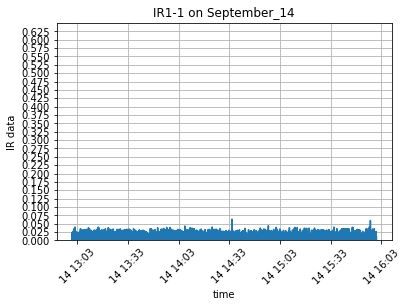

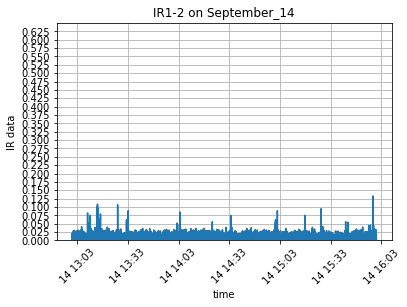

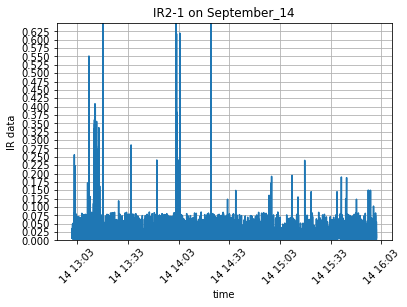

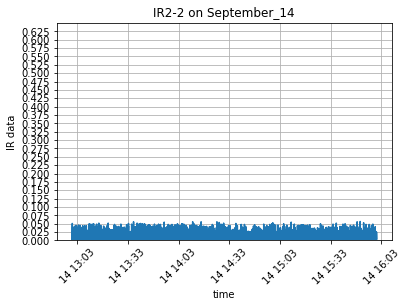

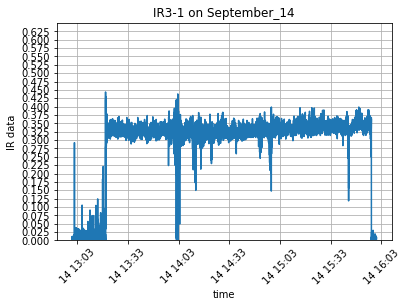

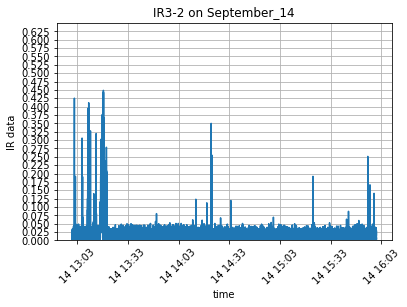

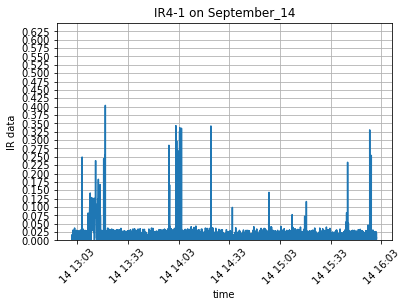

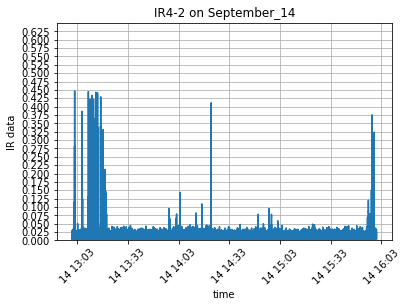

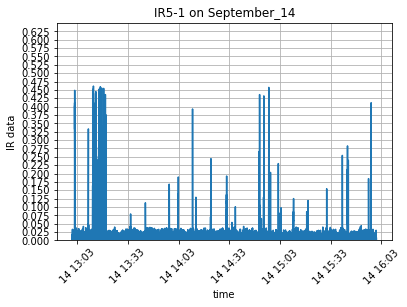

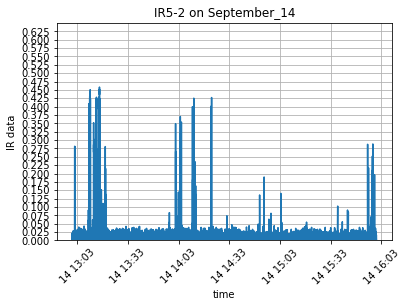

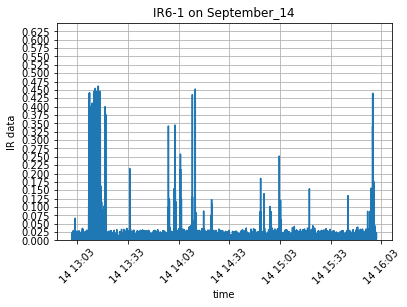

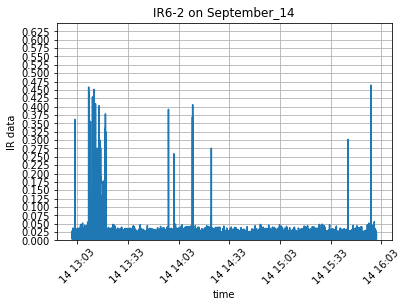

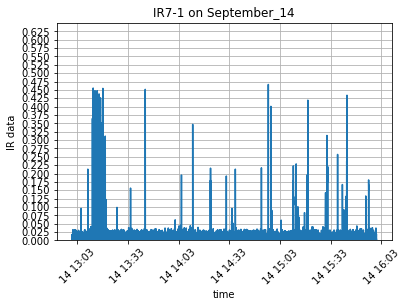

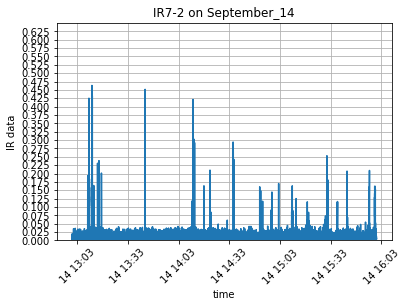

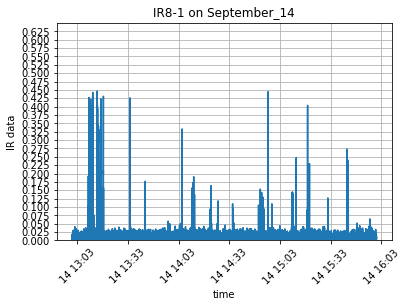

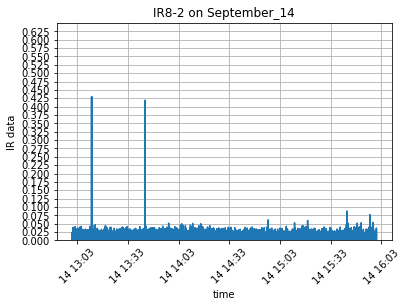

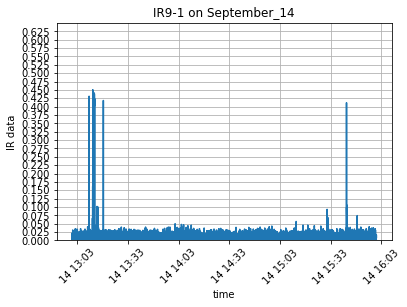

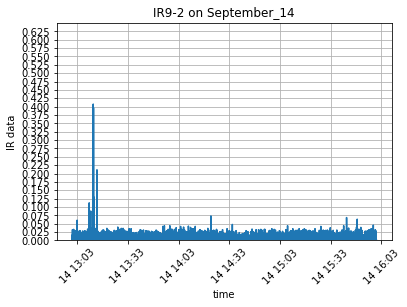

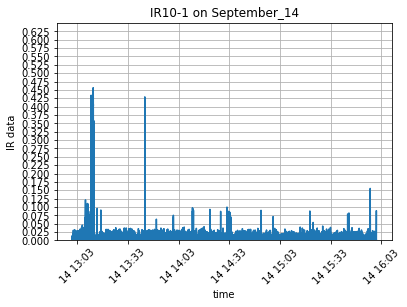

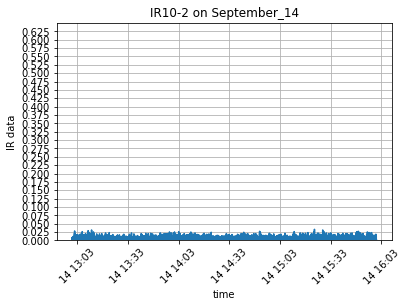

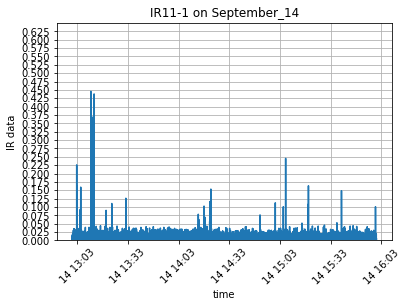

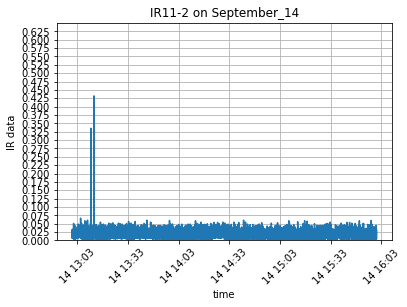

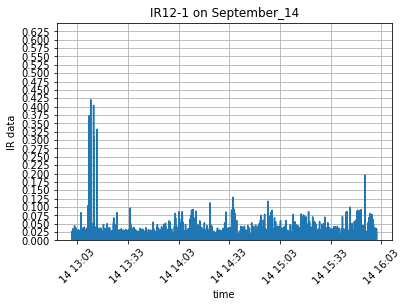

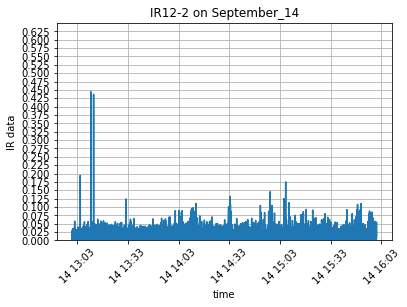

Loading: raw_sensor_data_from_master_script\02_sensor_data__September_17_2018_at_10-20-36.csv
3305 steps within interval


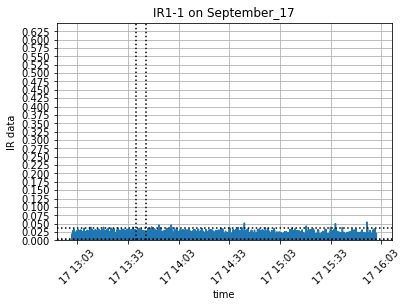

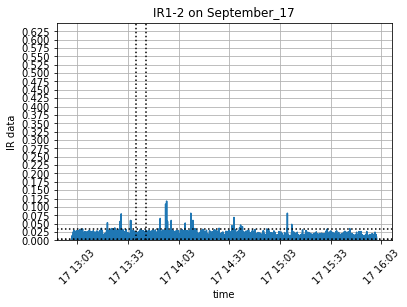

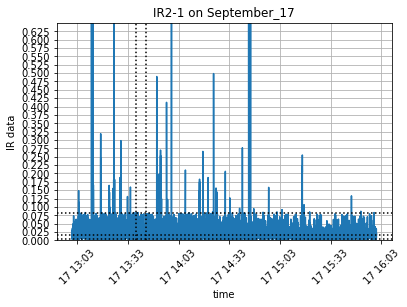

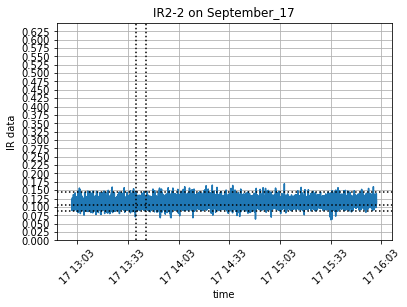

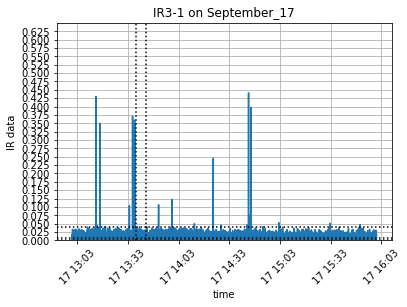

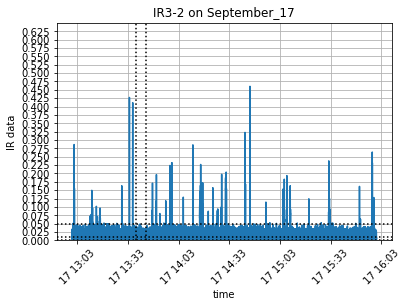

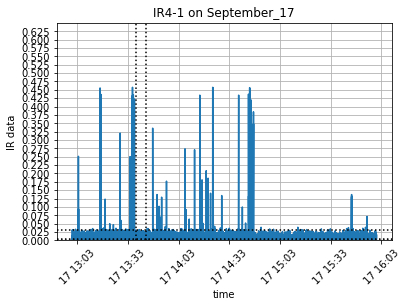

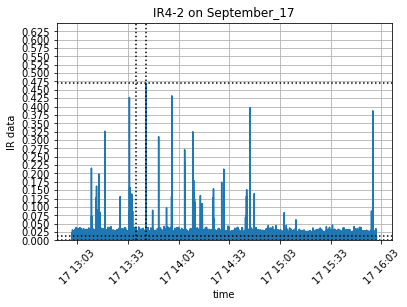

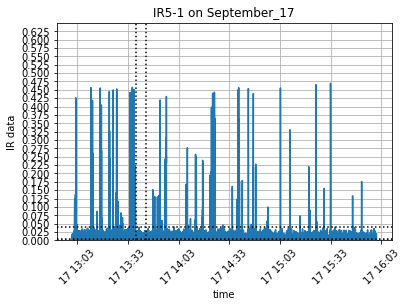

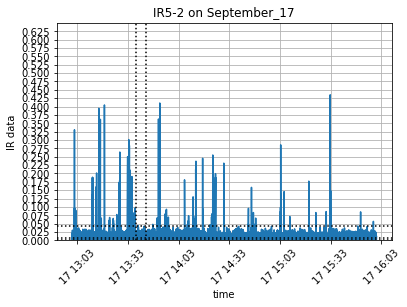

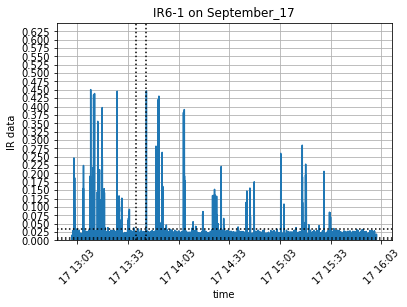

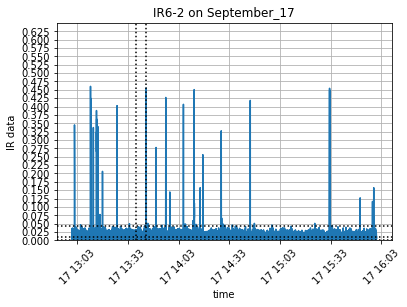

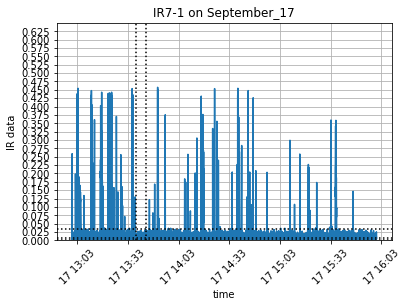

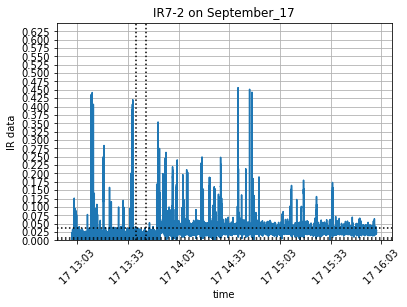

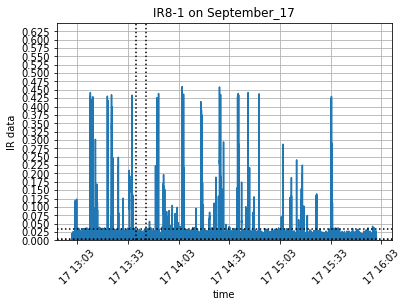

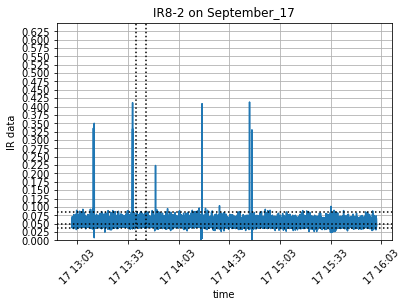

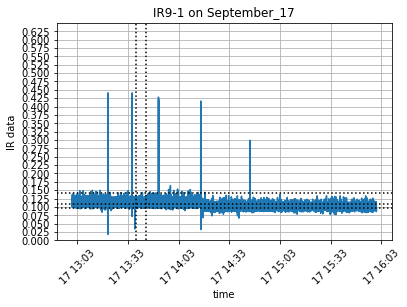

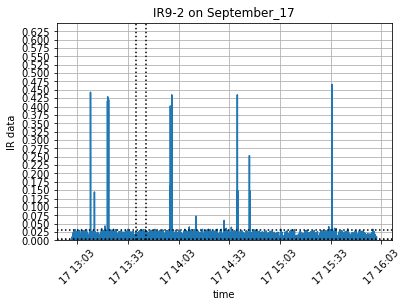

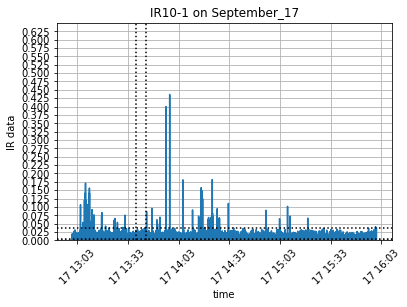

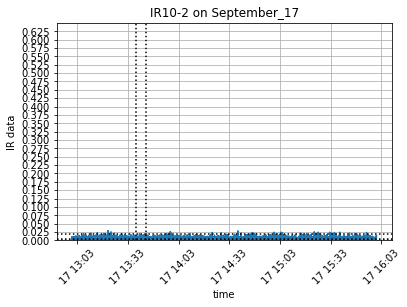

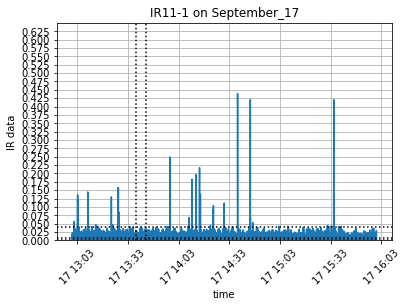

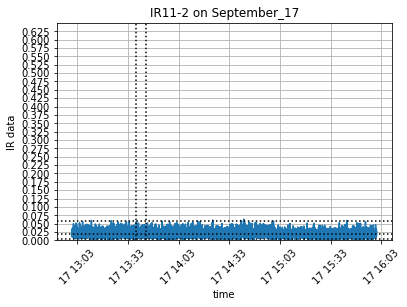

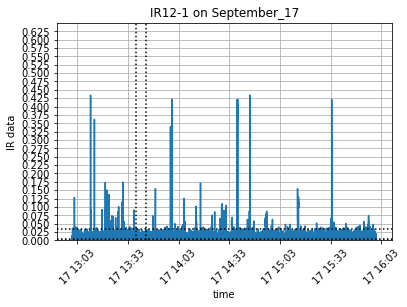

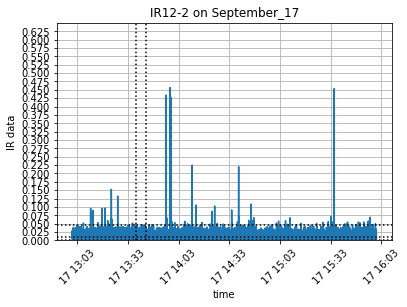

Loading: raw_sensor_data_from_master_script\03_sensor_data__September_18_2018_at_11-33-32.csv
1705 steps within interval


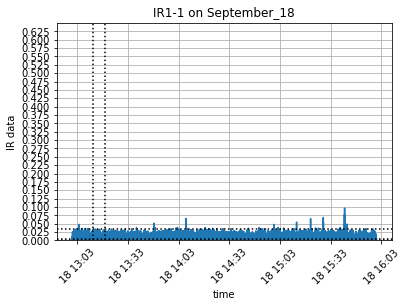

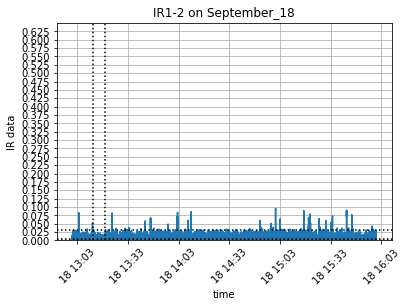

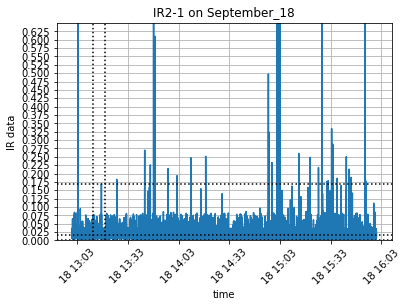

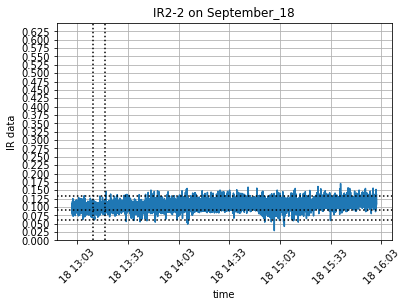

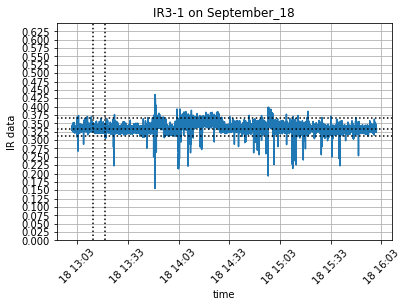

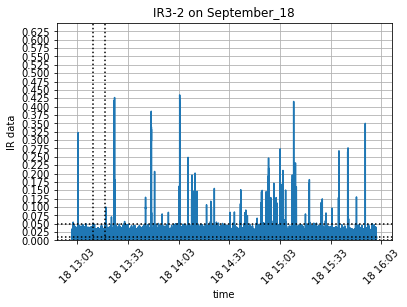

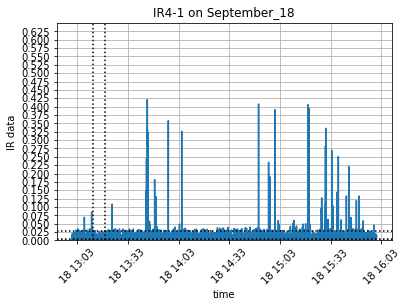

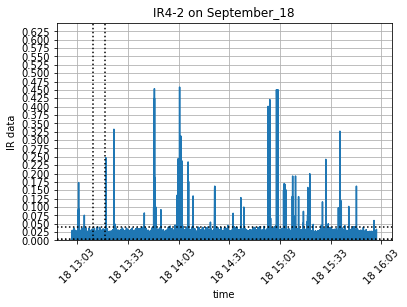

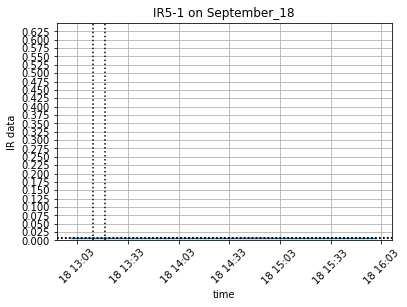

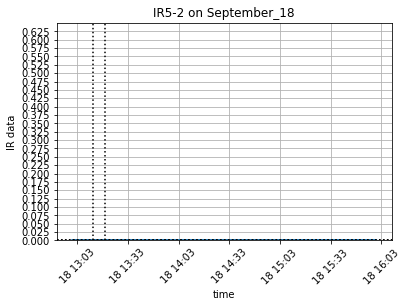

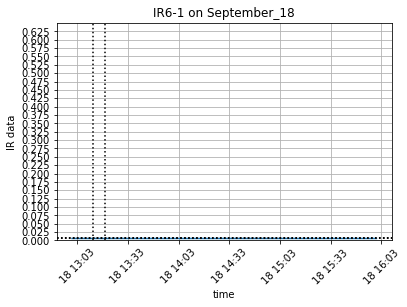

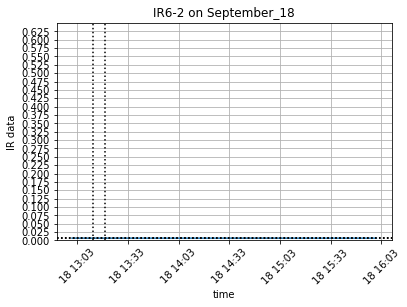

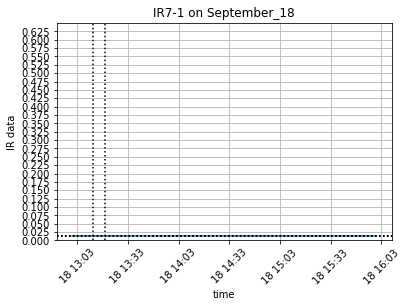

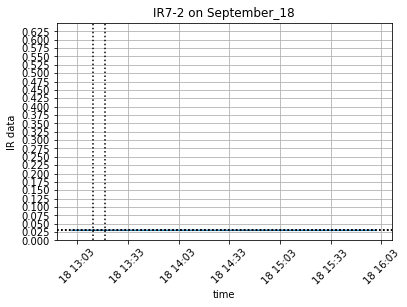

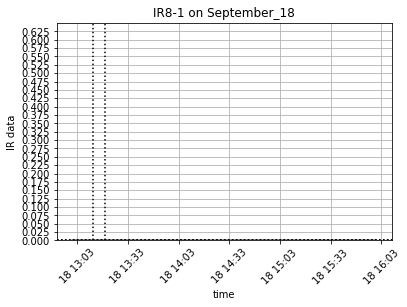

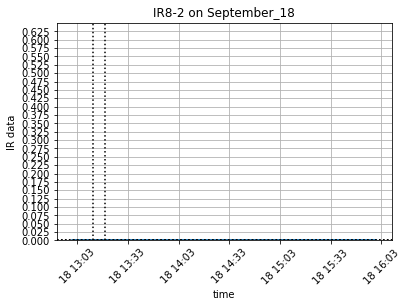

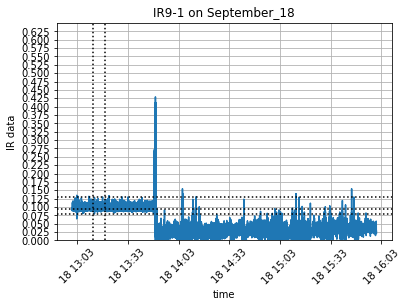

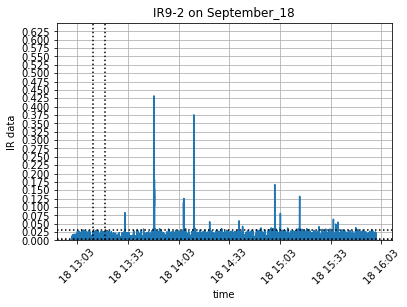

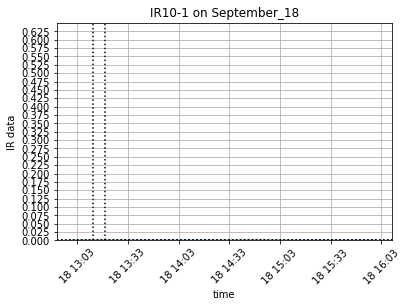

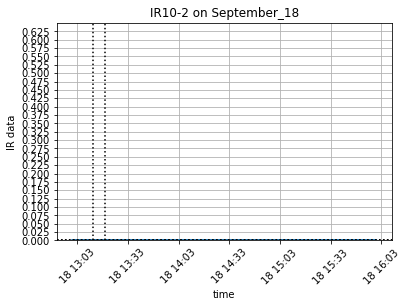

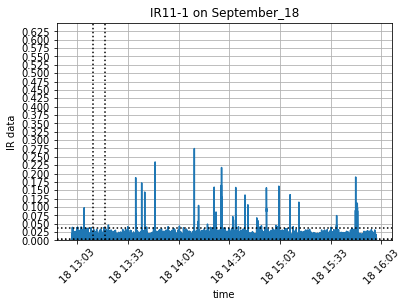

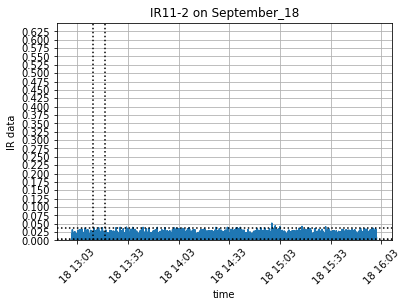

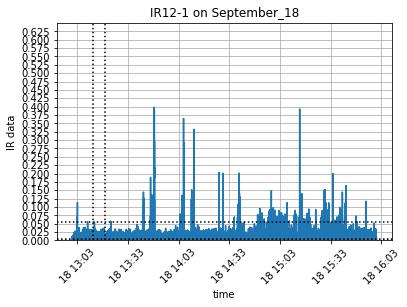

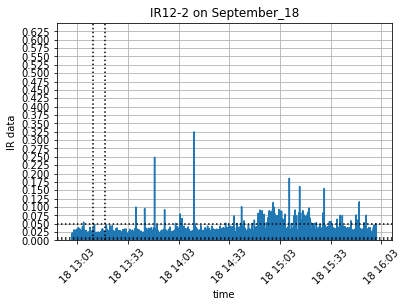

Loading: raw_sensor_data_from_master_script\04_sensor_data__September_19_2018_at_09-33-44.csv
3800 steps within interval


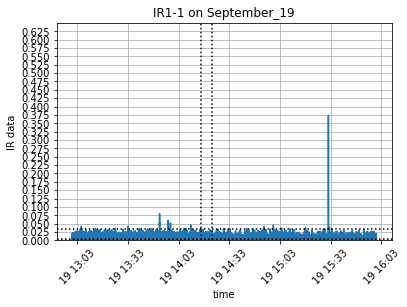

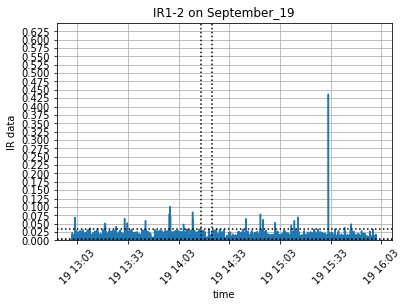

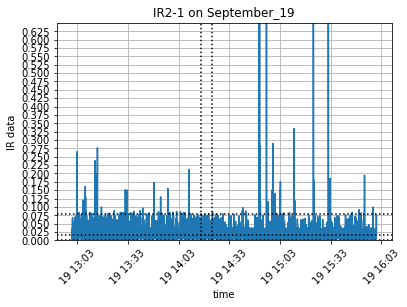

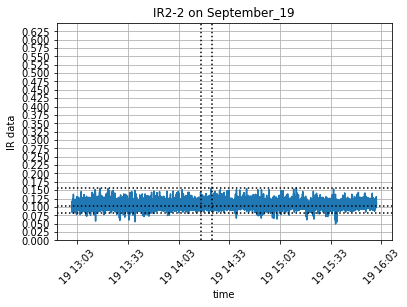

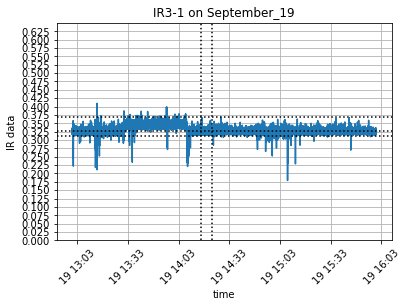

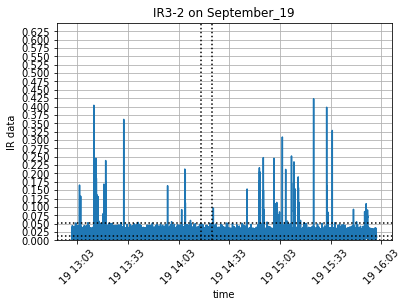

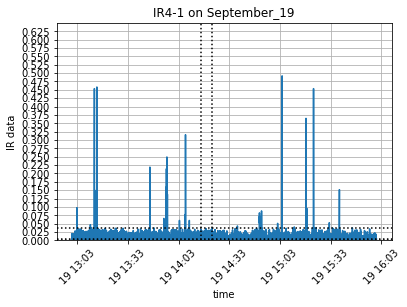

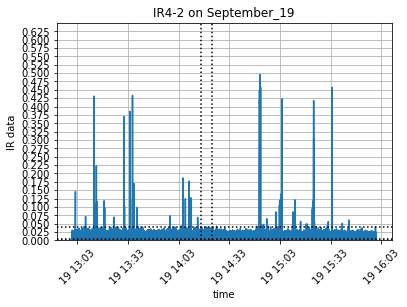

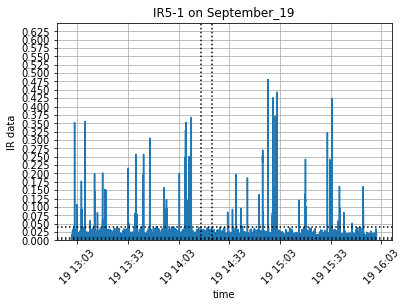

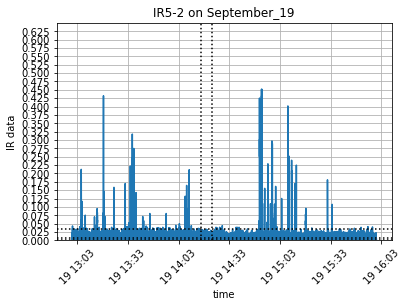

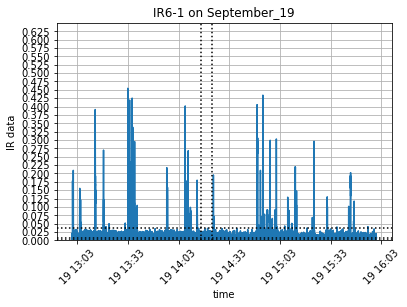

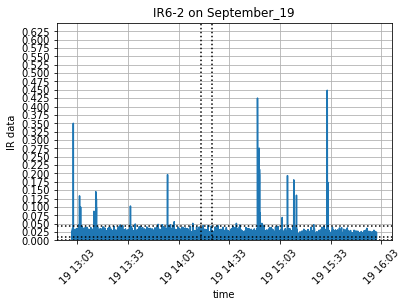

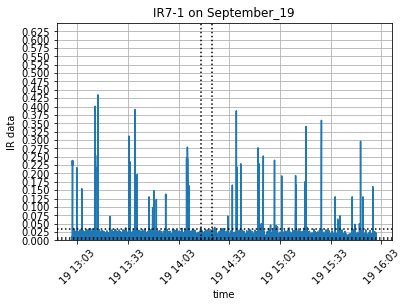

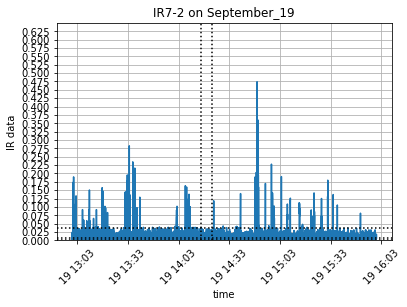

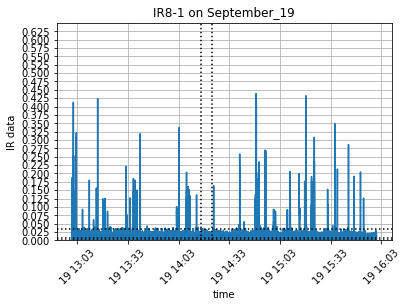

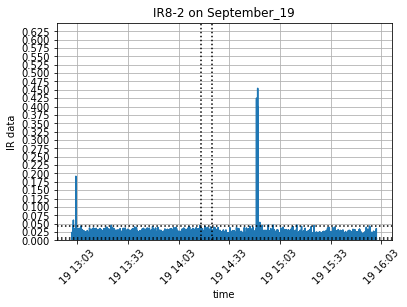

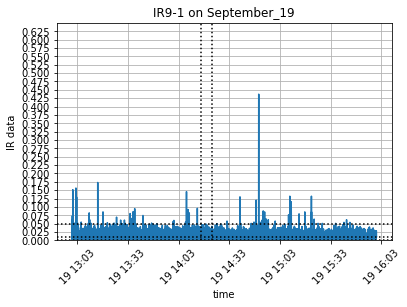

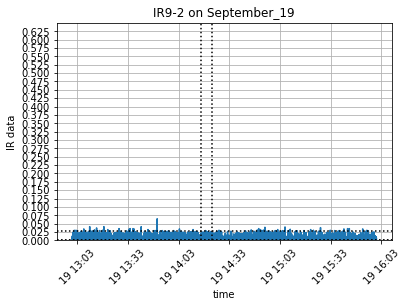

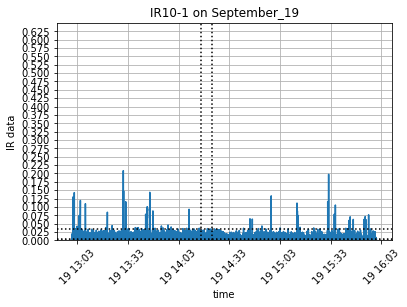

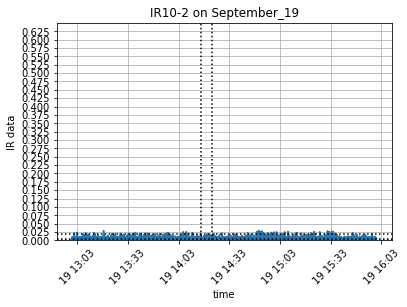

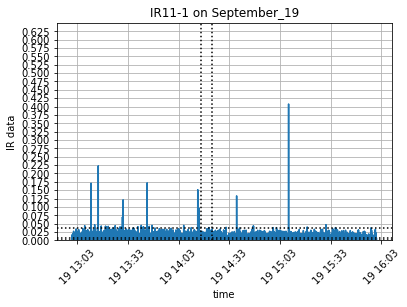

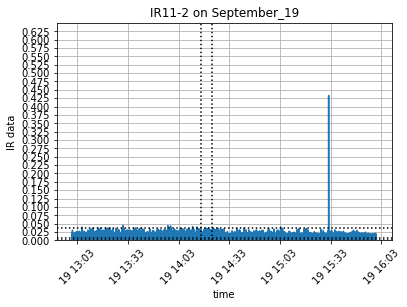

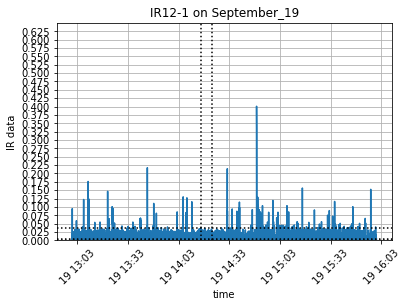

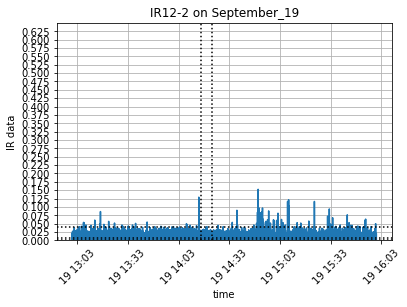

Loading: raw_sensor_data_from_master_script\05_sensor_data__September_20_2018_at_12-58-58.csv
1929 steps within interval


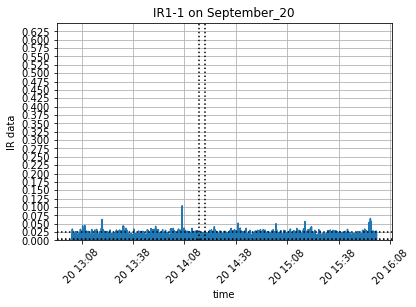

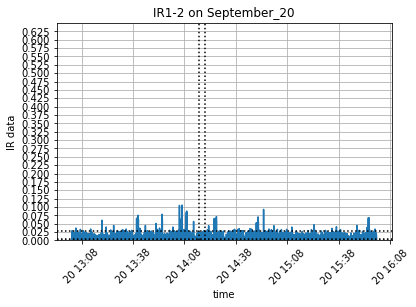

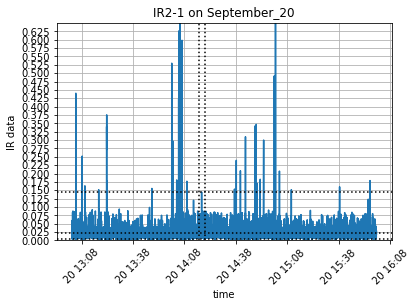

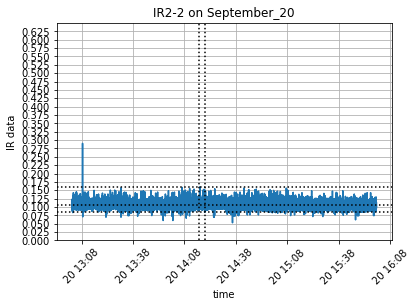

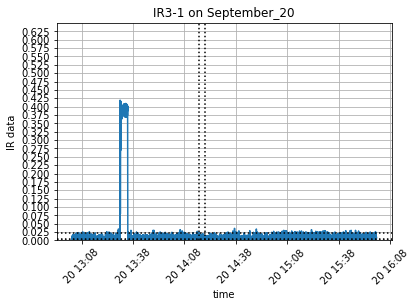

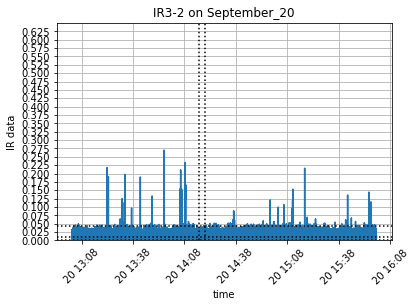

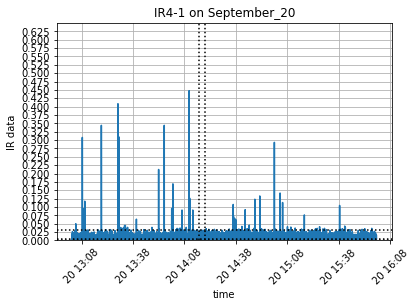

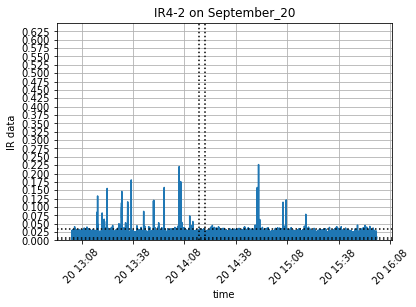

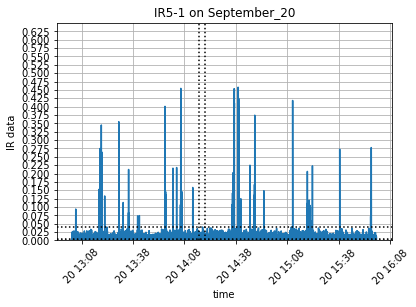

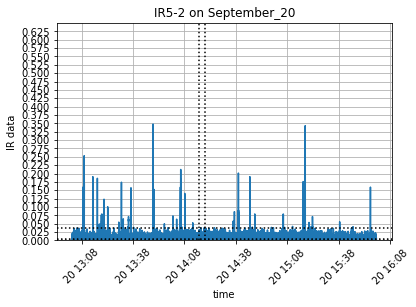

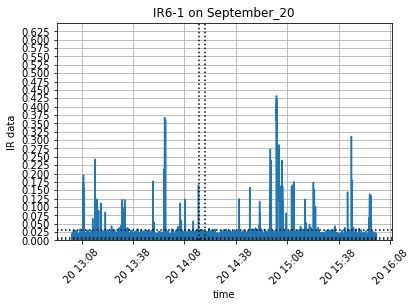

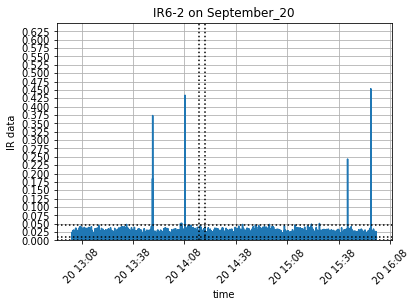

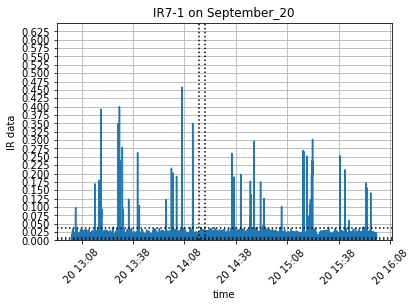

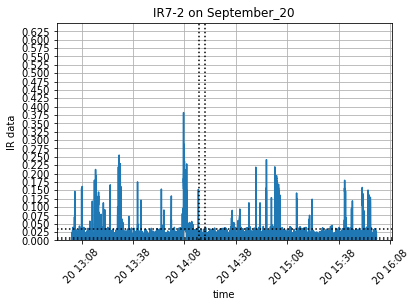

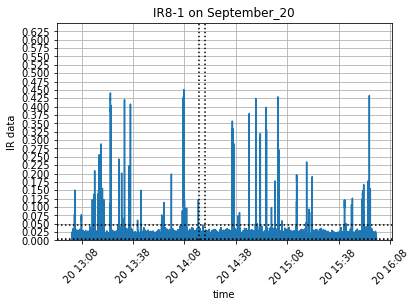

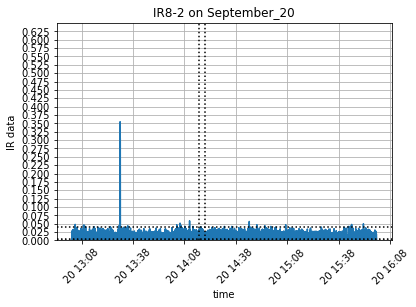

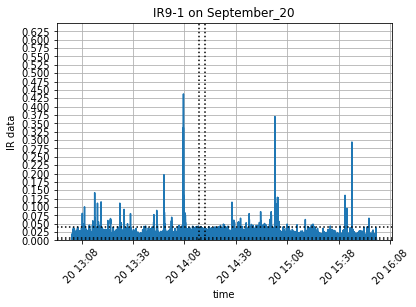

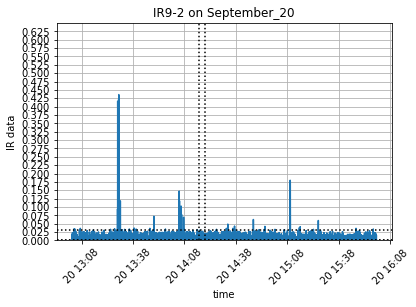

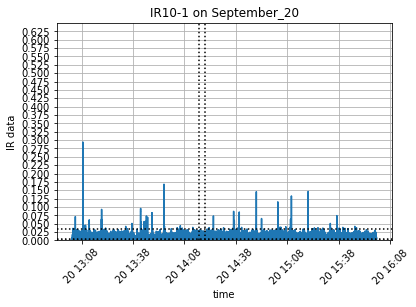

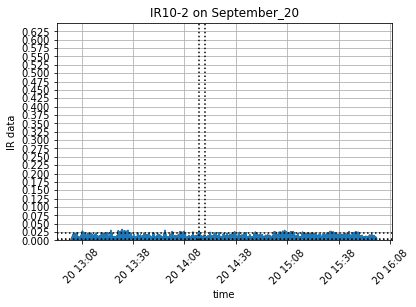

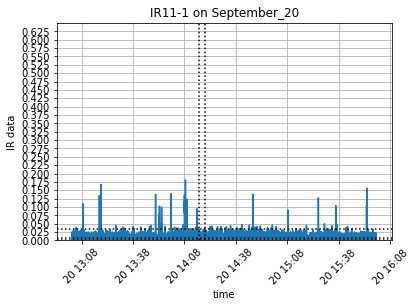

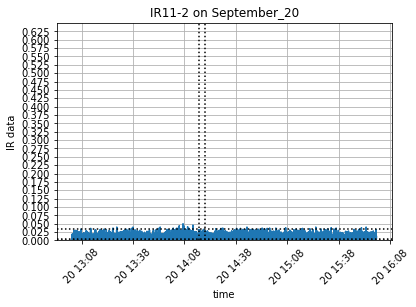

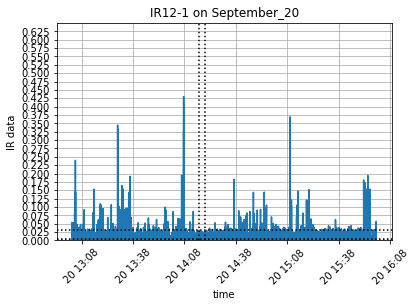

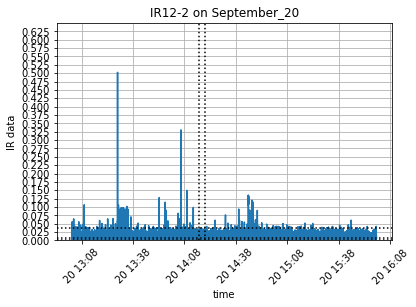

Loading: raw_sensor_data_from_master_script\06_sensor_data__September_21_2018_at_12-59-00.csv
1332 steps within interval


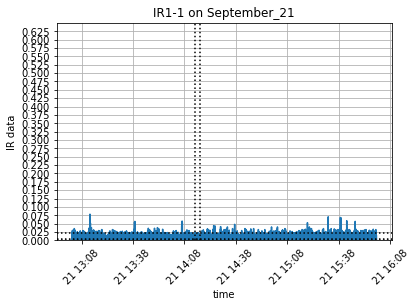

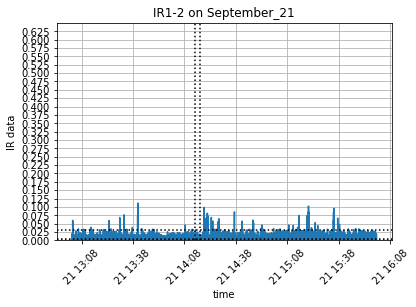

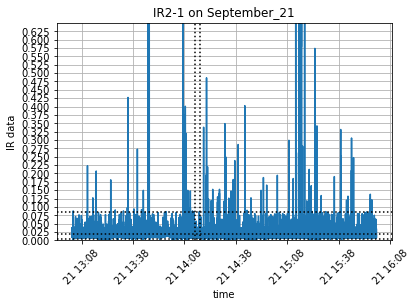

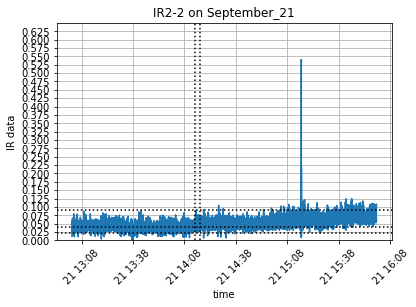

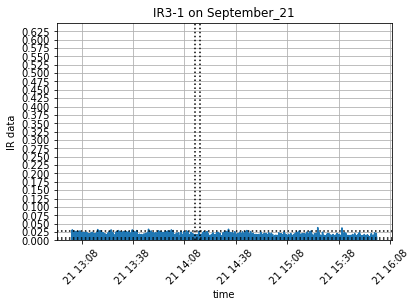

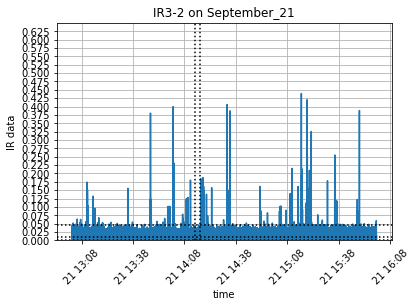

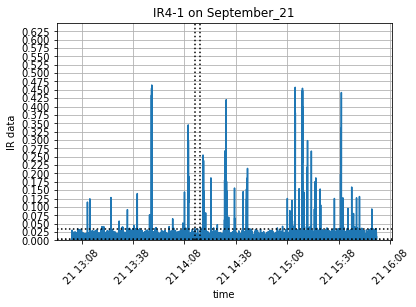

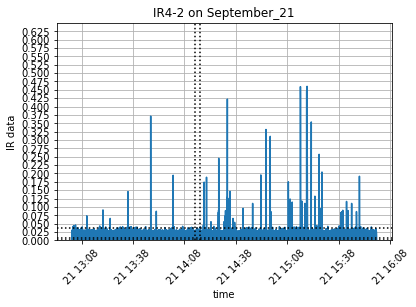

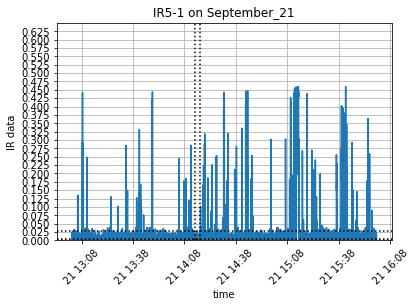

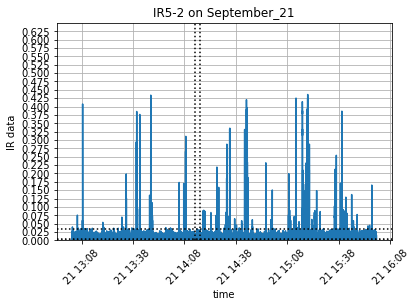

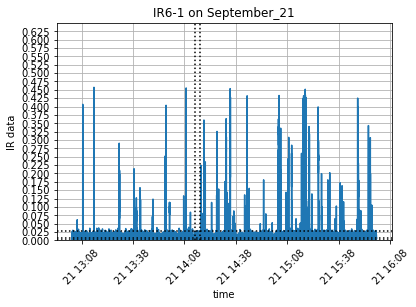

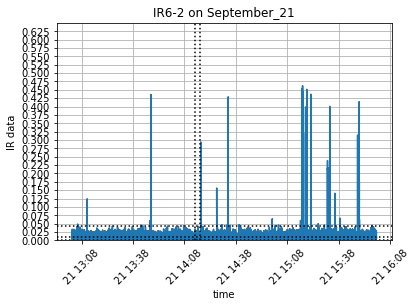

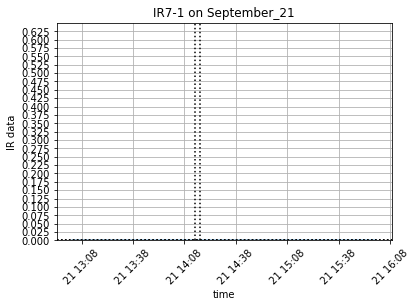

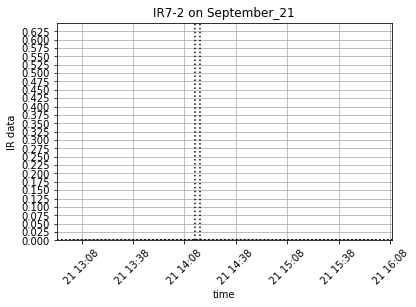

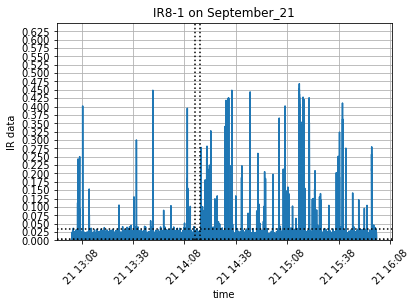

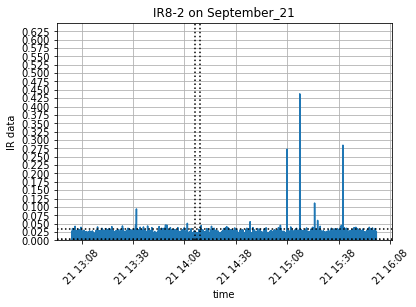

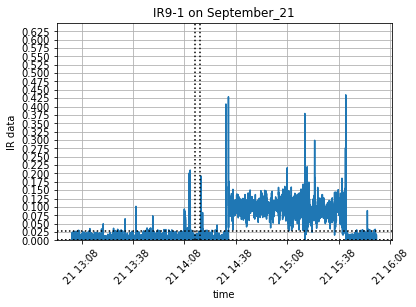

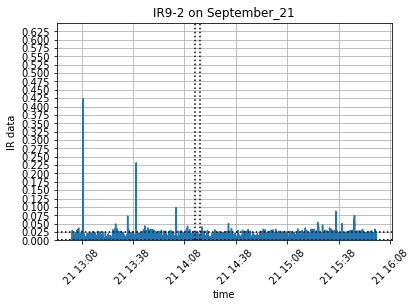

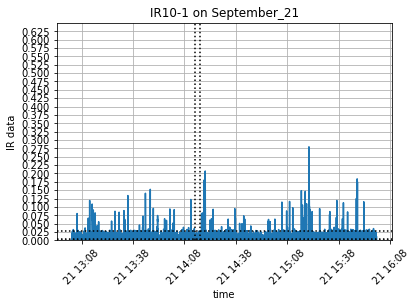

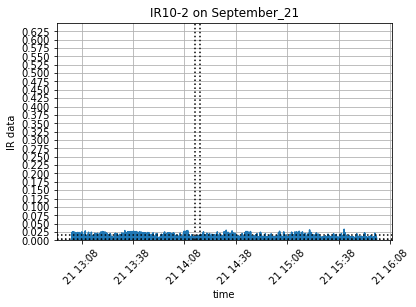

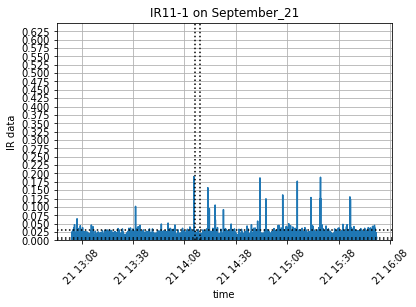

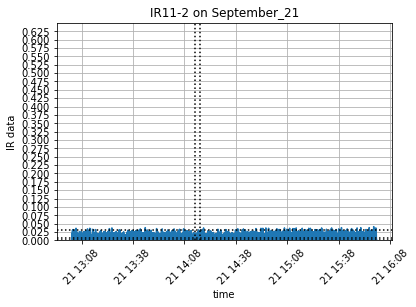

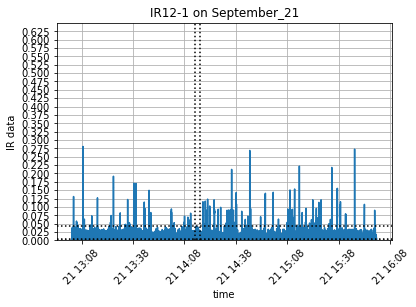

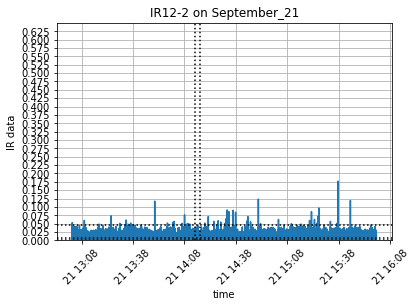

Loading: raw_sensor_data_from_master_script\07_sensor_data__September_24_2018_at_11-45-01.csv
1650 steps within interval


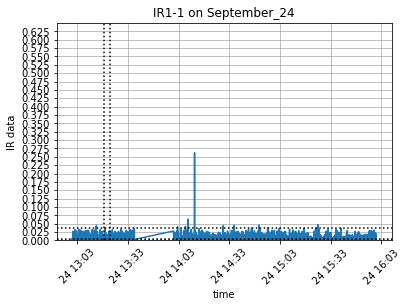

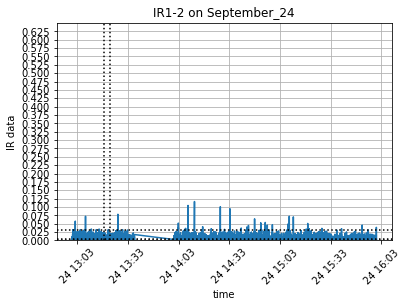

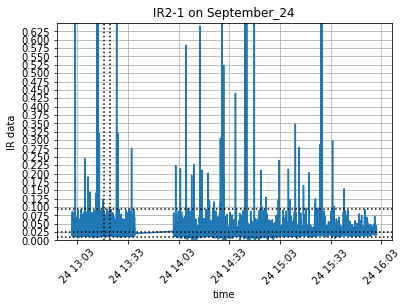

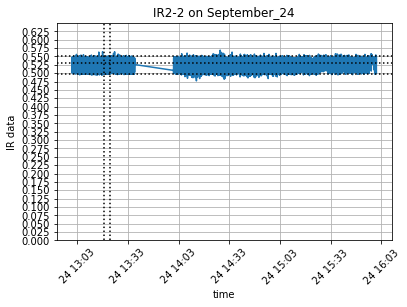

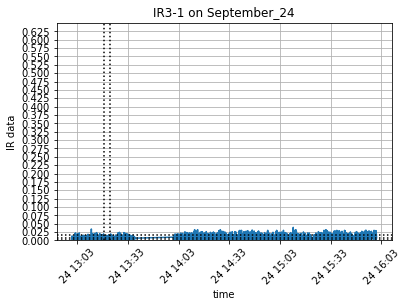

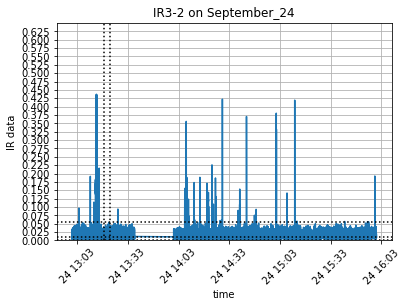

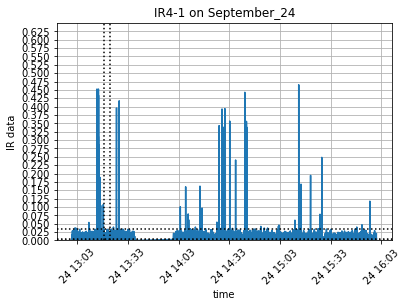

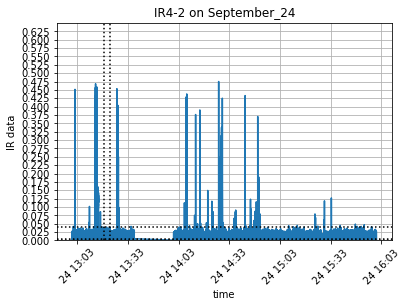

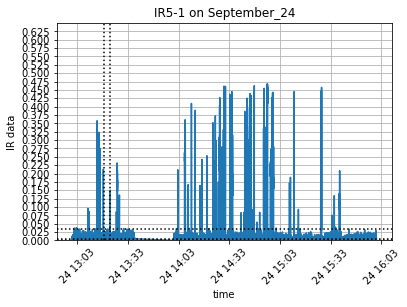

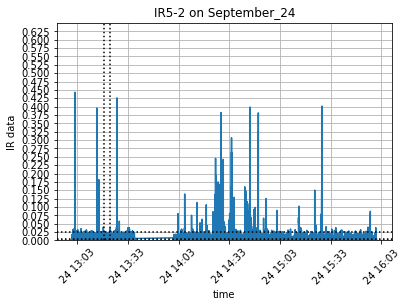

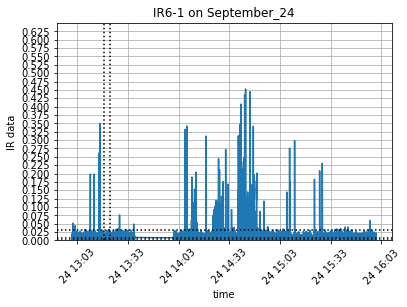

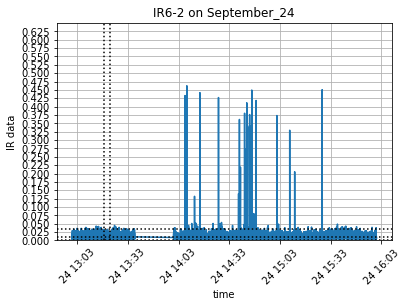

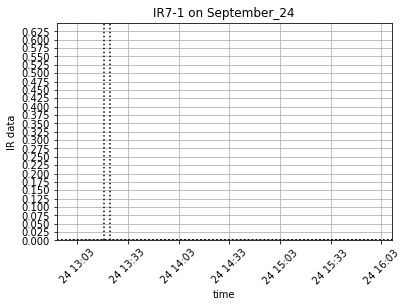

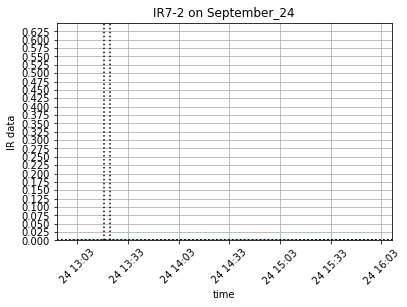

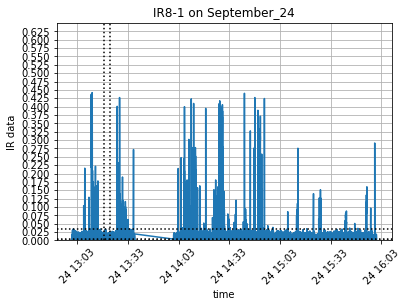

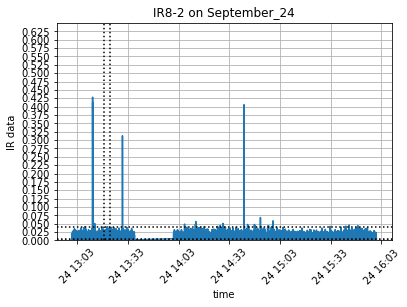

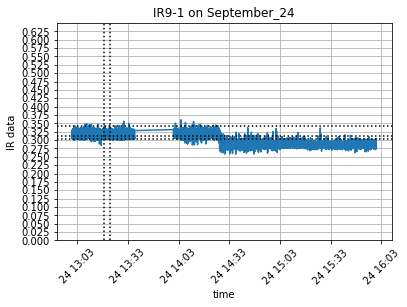

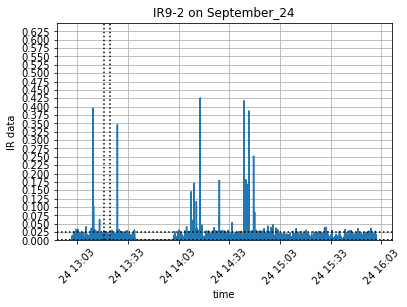

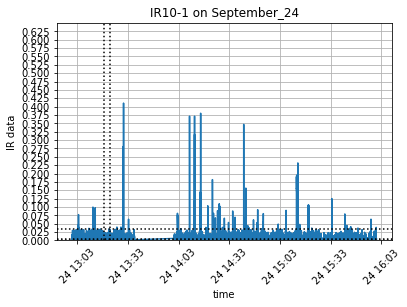

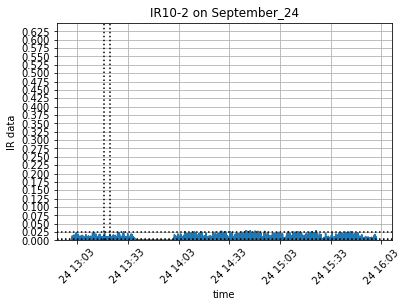

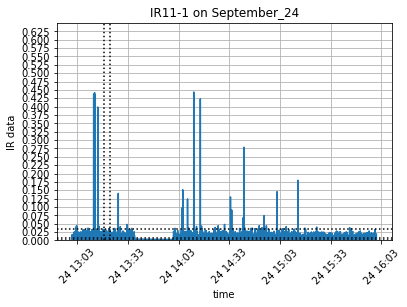

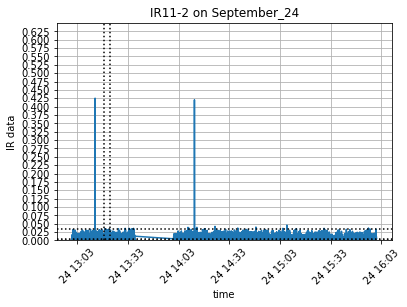

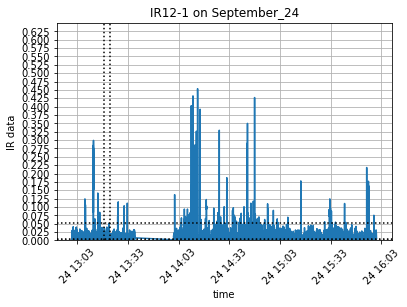

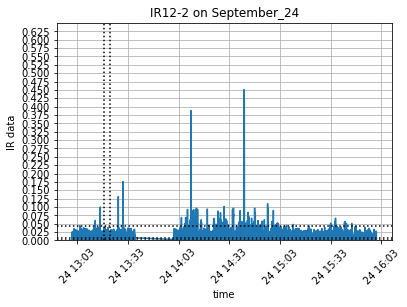

Loading: raw_sensor_data_from_master_script\08_sensor_data__September_25_2018_at_11-17-27.csv
2876 steps within interval


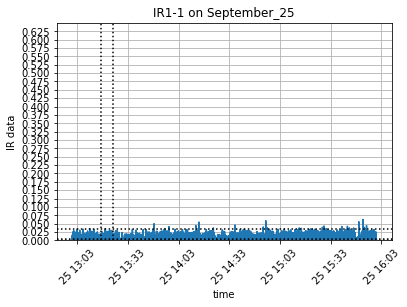

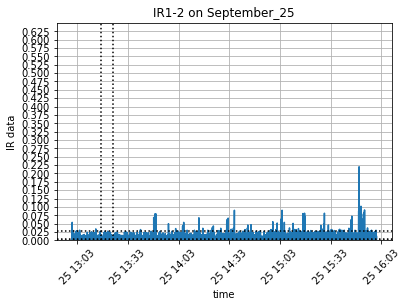

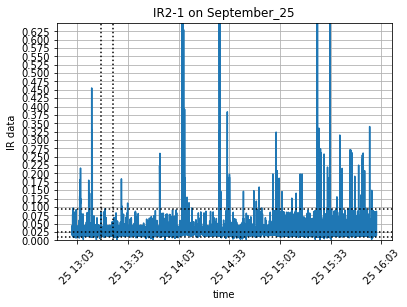

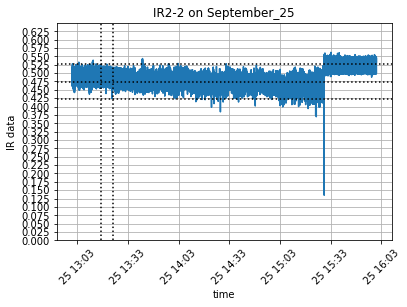

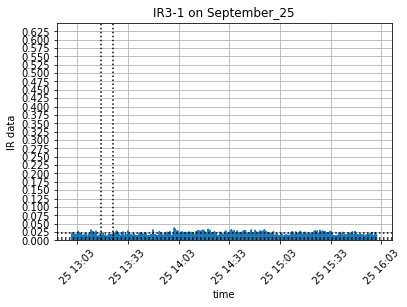

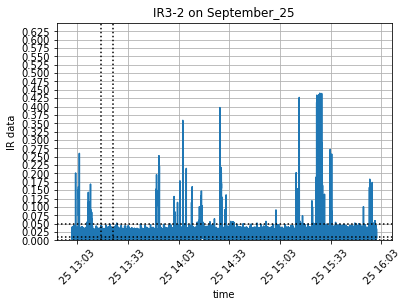

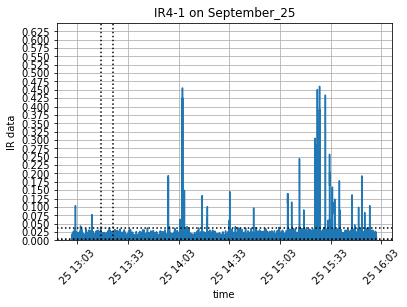

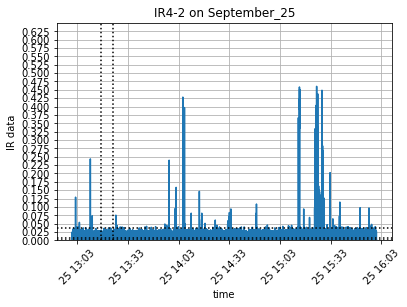

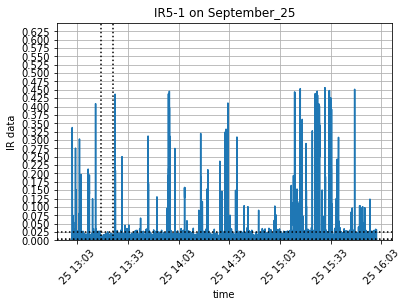

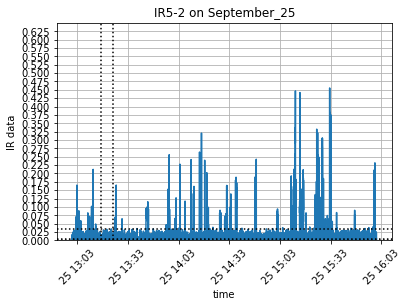

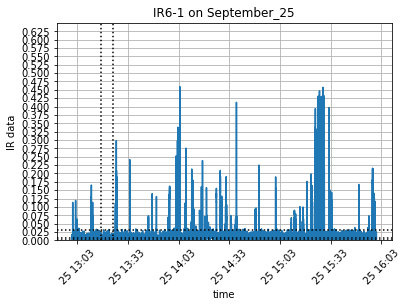

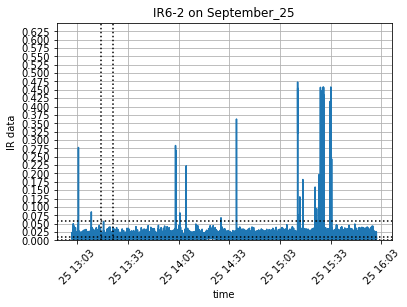

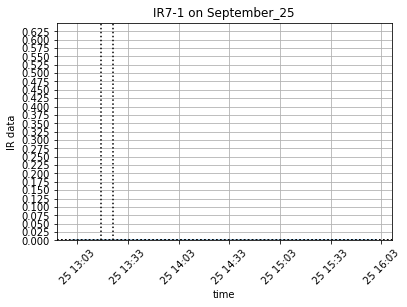

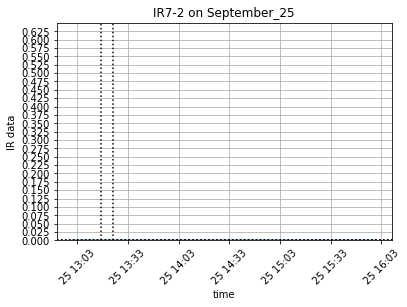

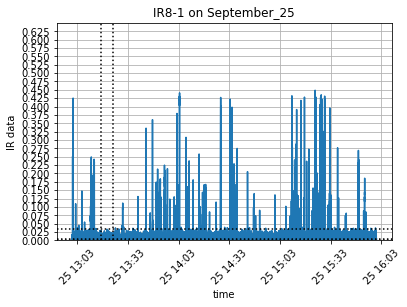

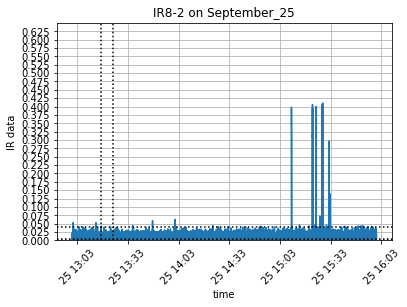

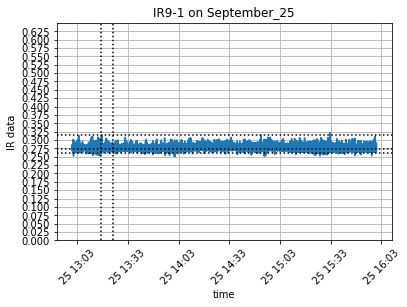

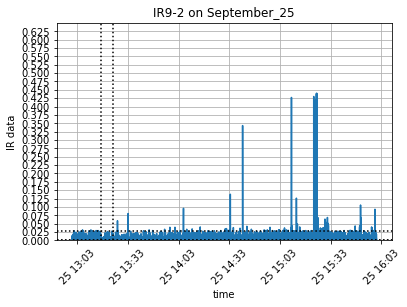

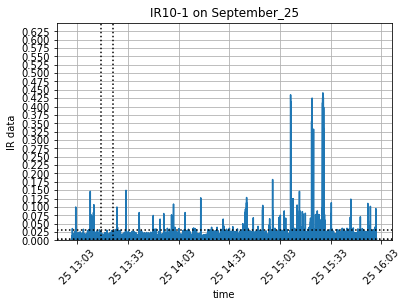

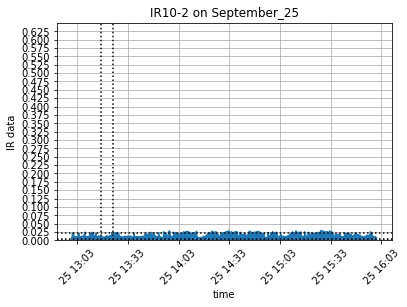

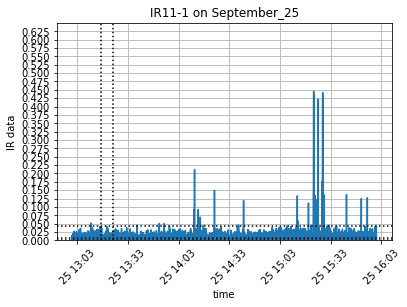

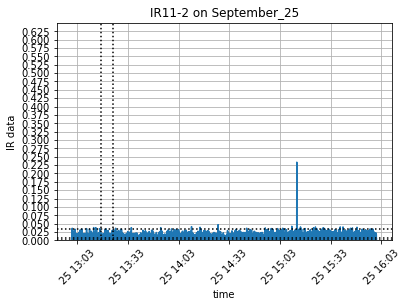

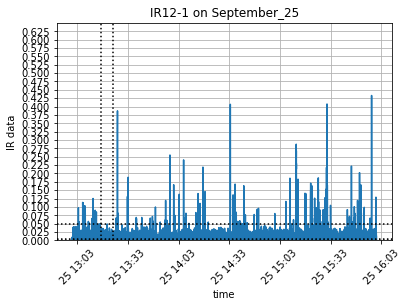

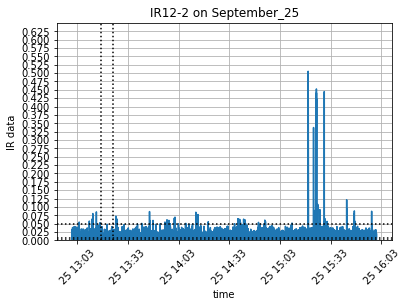

Loading: raw_sensor_data_from_master_script\09_sensor_data__September_26_2018_at_09-43-46.csv
2647 steps within interval


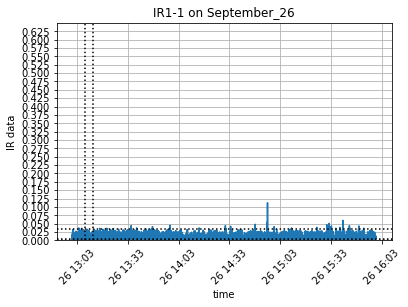

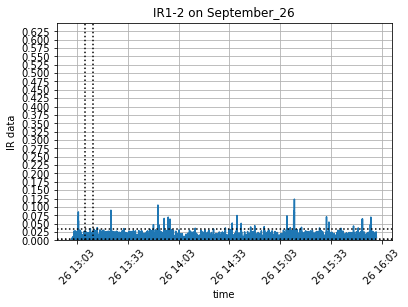

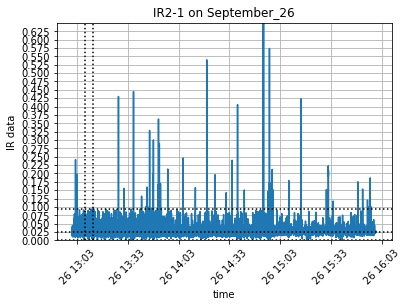

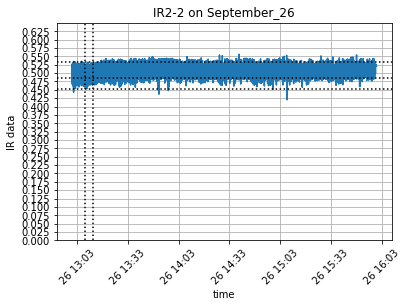

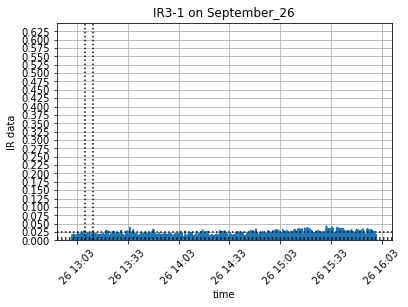

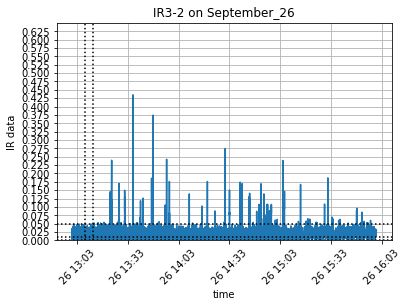

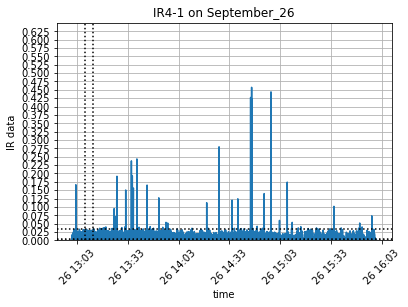

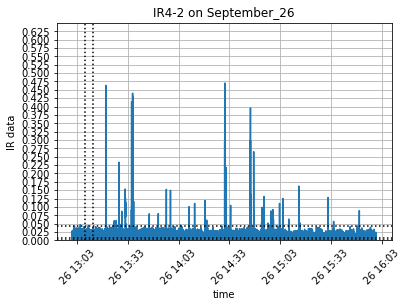

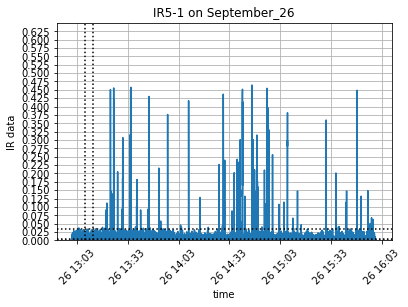

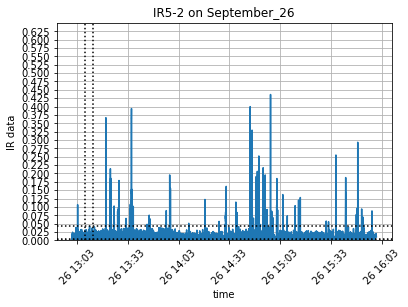

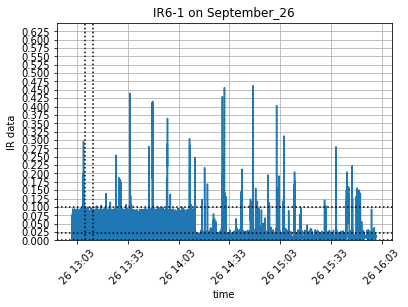

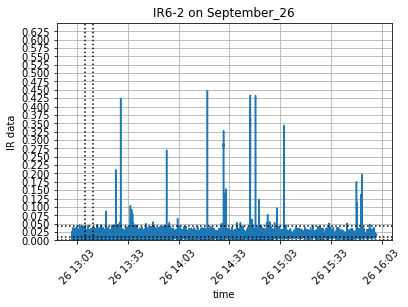

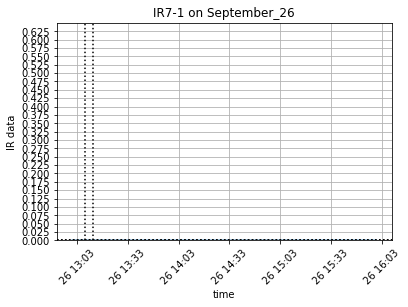

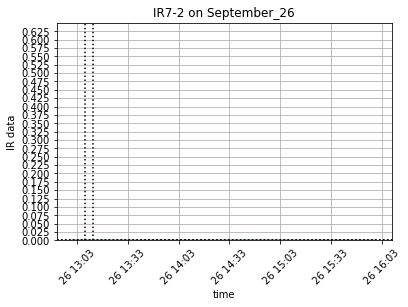

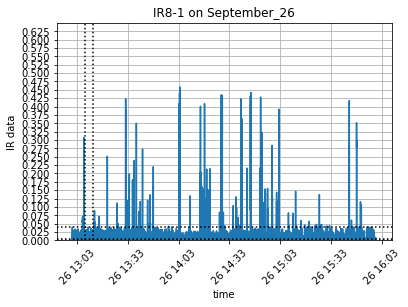

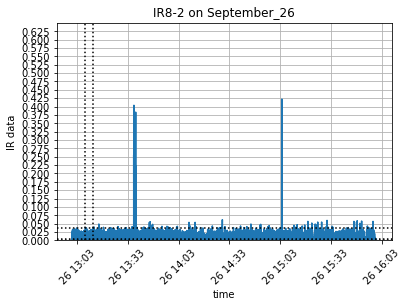

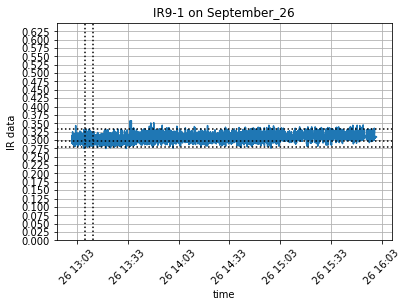

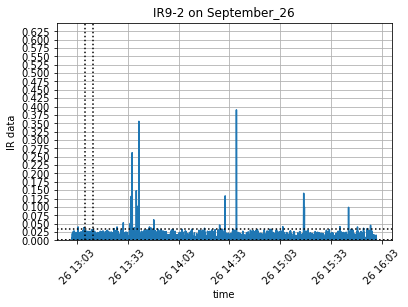

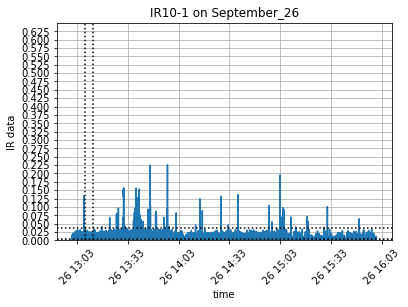

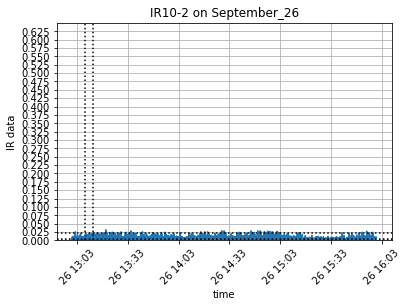

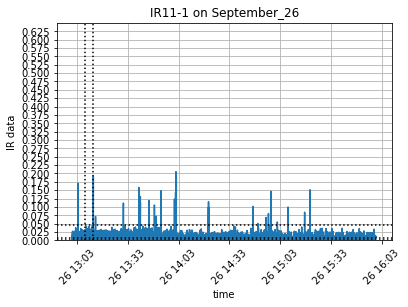

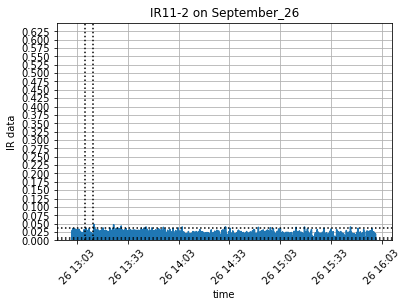

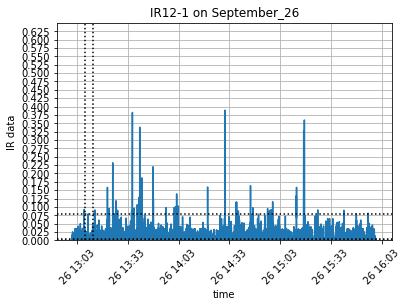

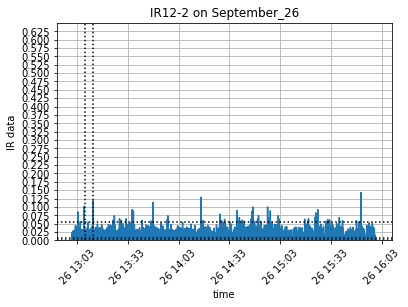

Loading: raw_sensor_data_from_master_script\10_sensor_data__September_27_2018_at_09-00-00.csv
265 steps within interval


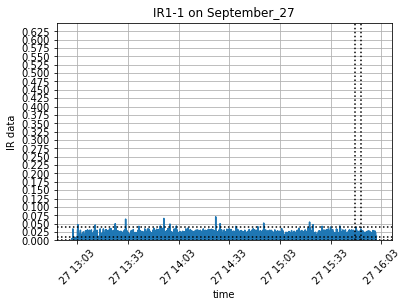

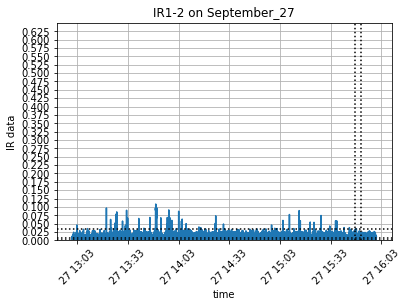

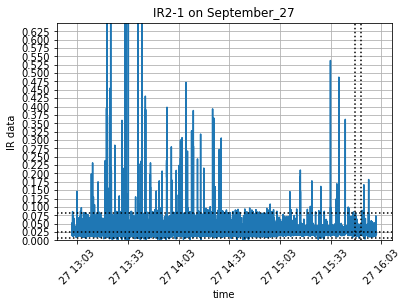

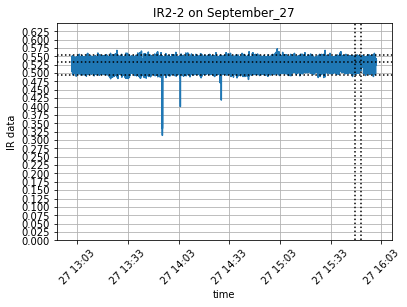

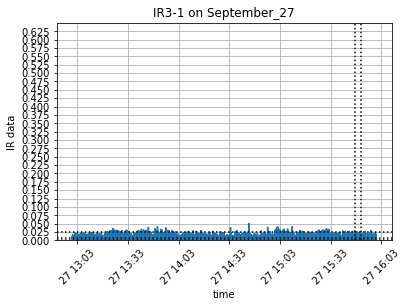

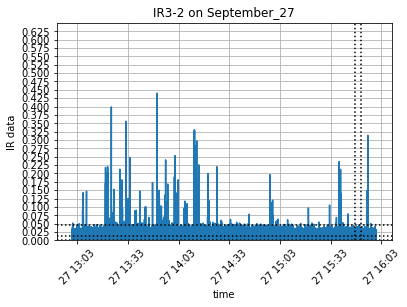

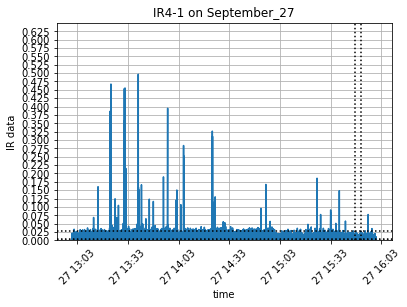

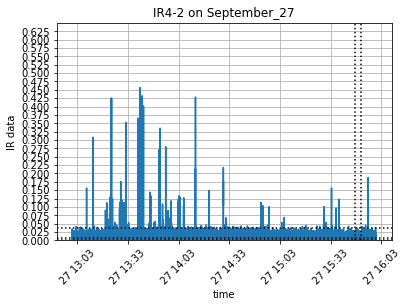

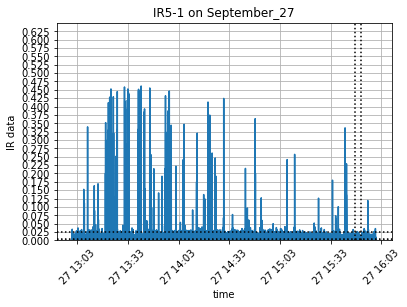

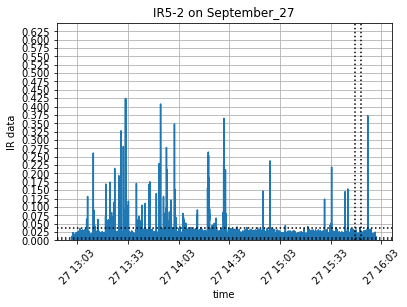

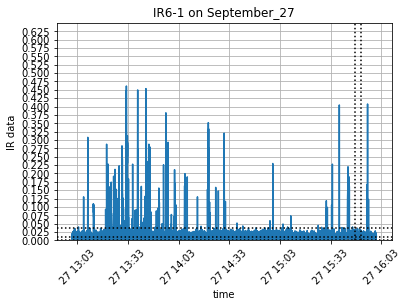

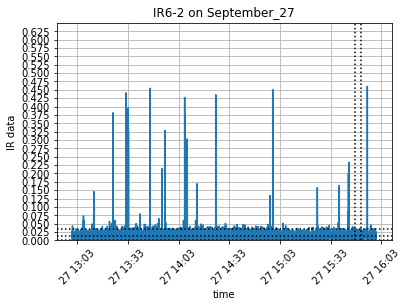

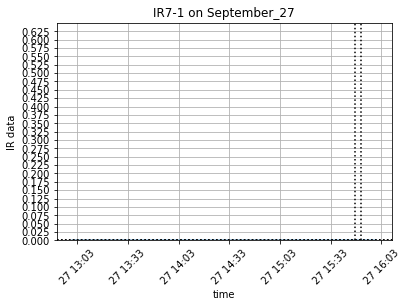

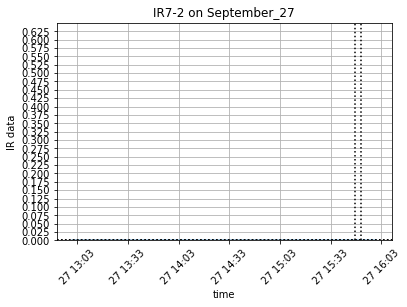

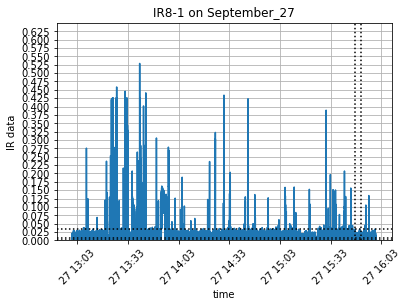

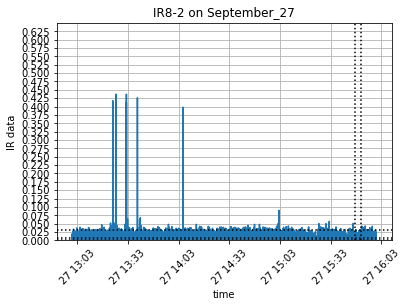

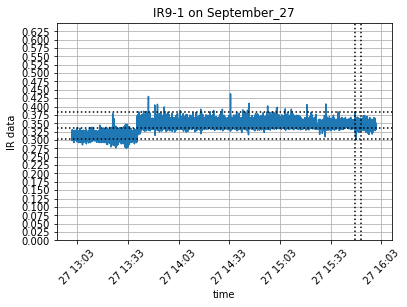

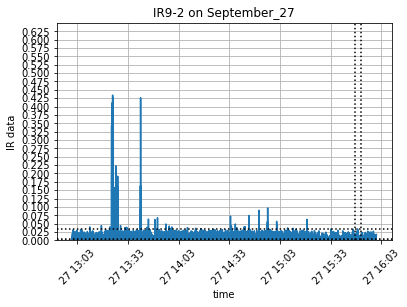

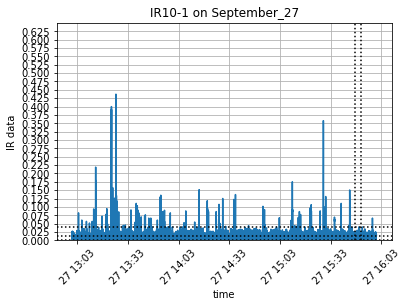

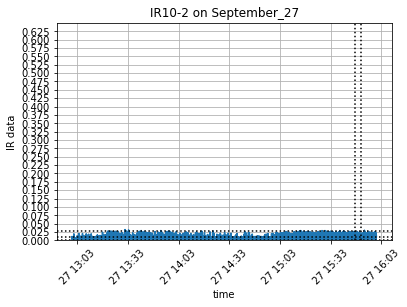

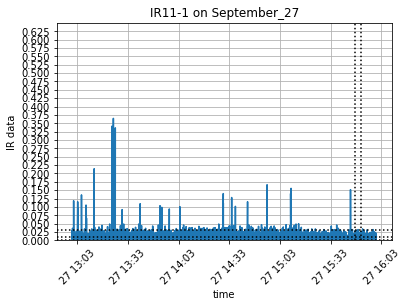

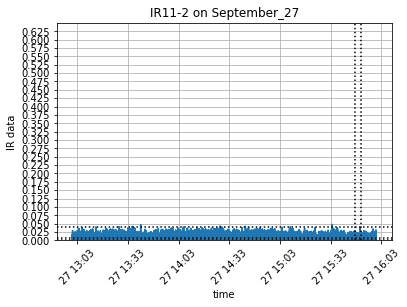

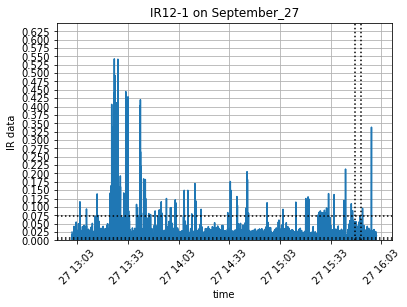

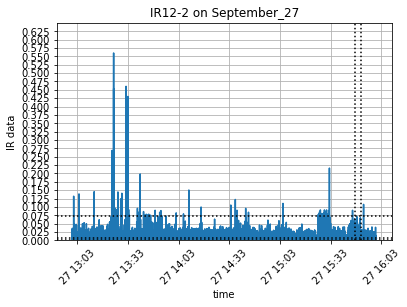

Loading: raw_sensor_data_from_master_script\11_sensor_data__September_28_2018_at_12-38-25.csv
6365 steps within interval


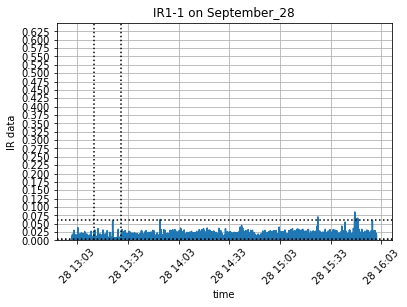

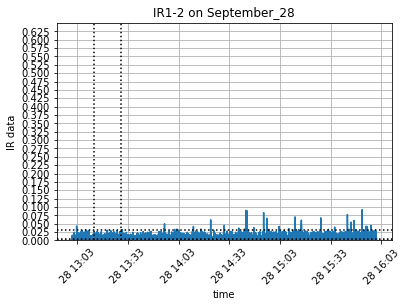

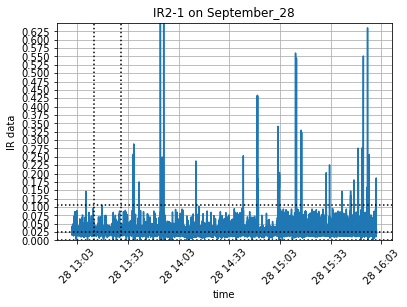

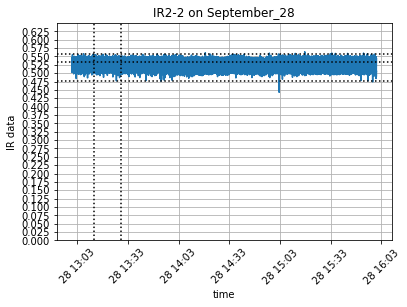

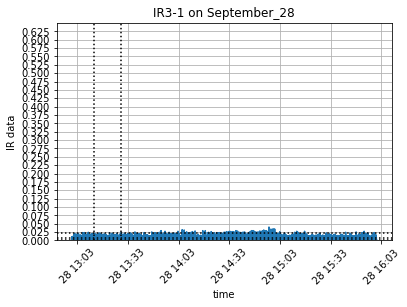

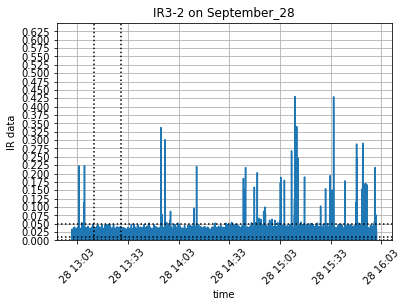

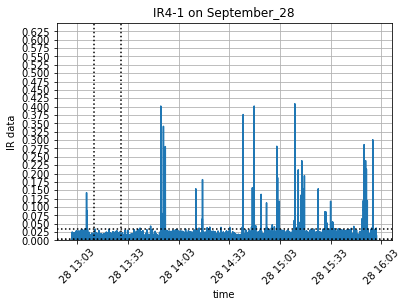

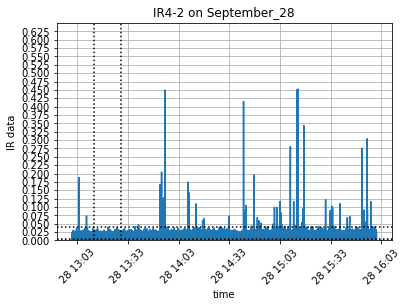

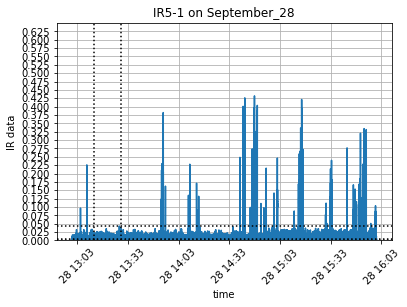

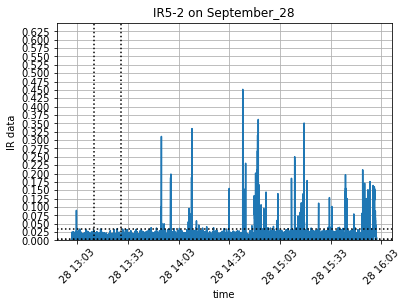

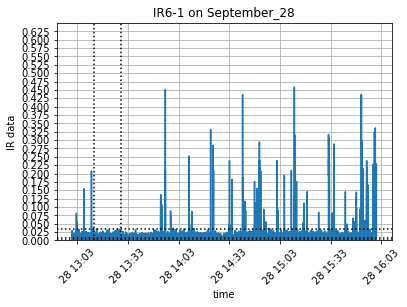

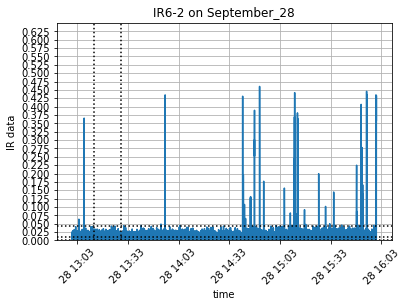

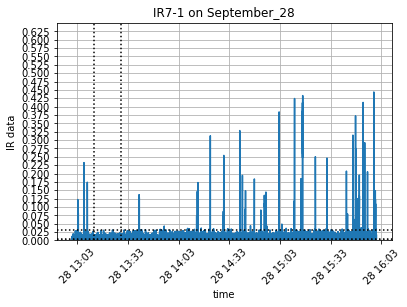

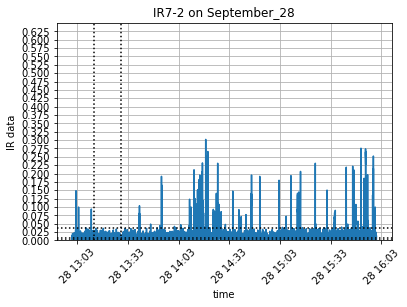

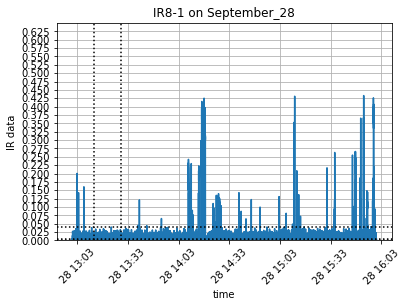

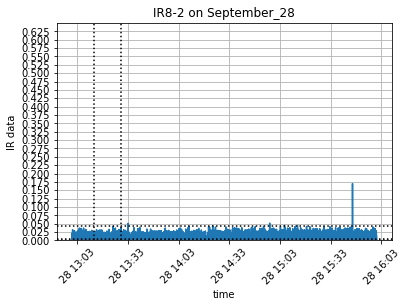

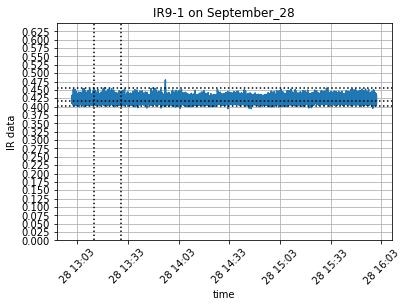

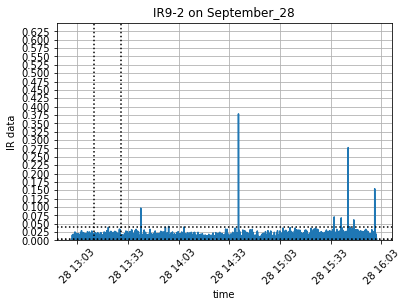

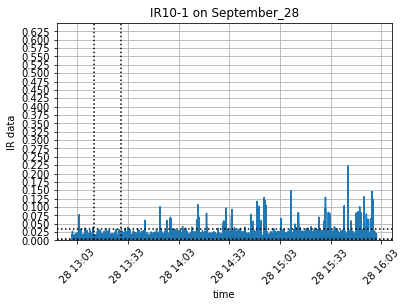

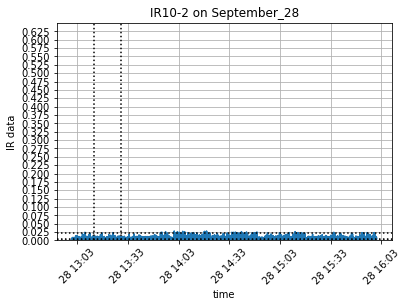

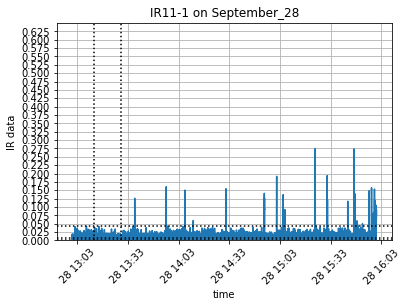

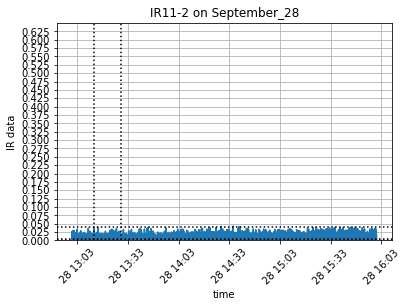

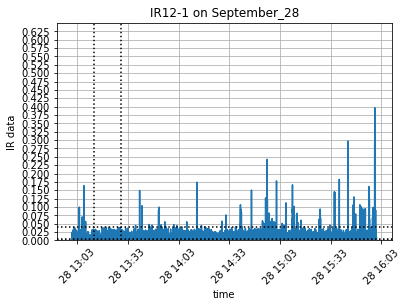

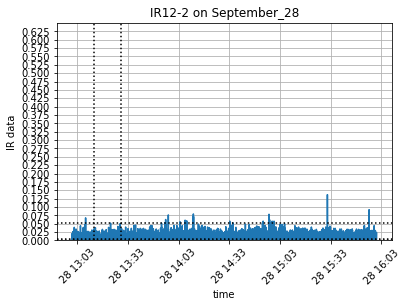

Loading: raw_sensor_data_from_master_script\12_sensor_data__October_02_2018_at_10-33-23.csv
1292 steps within interval


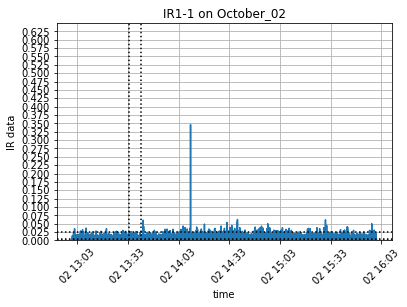

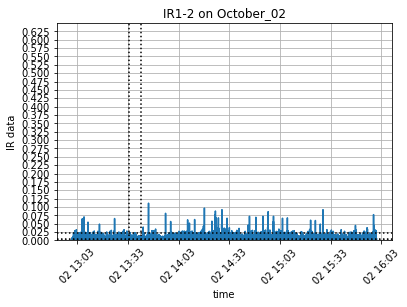

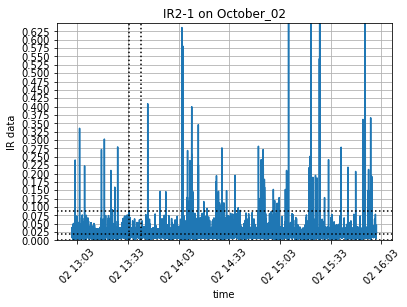

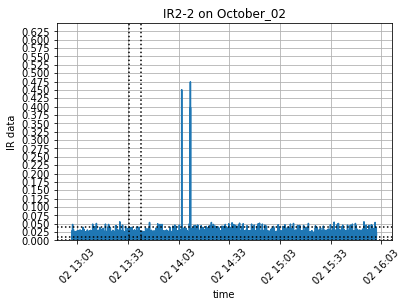

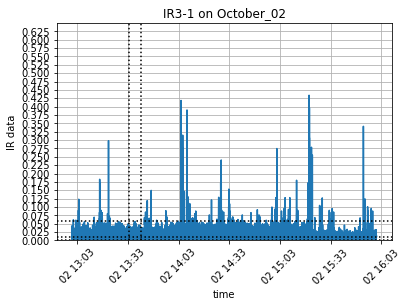

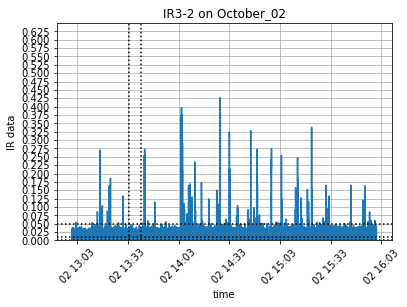

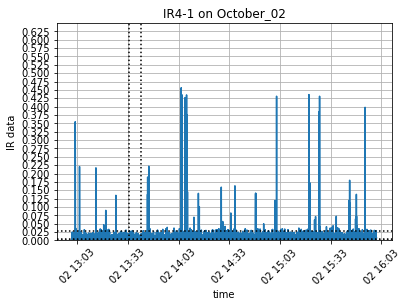

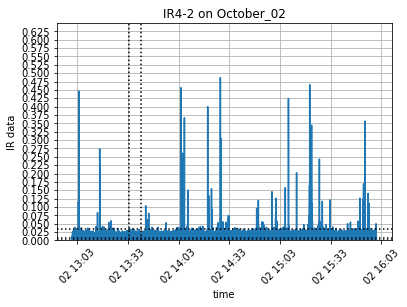

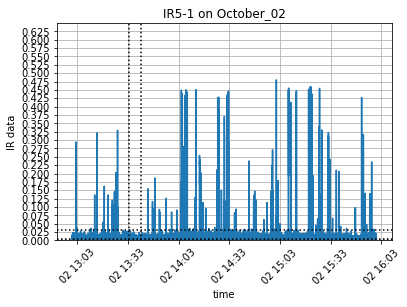

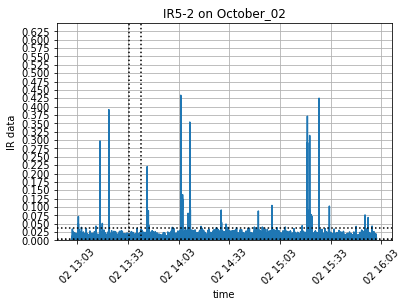

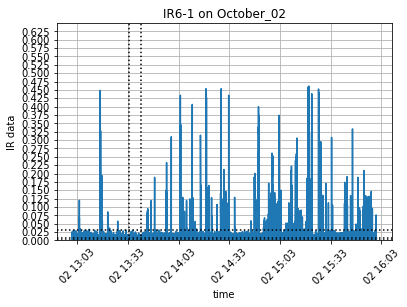

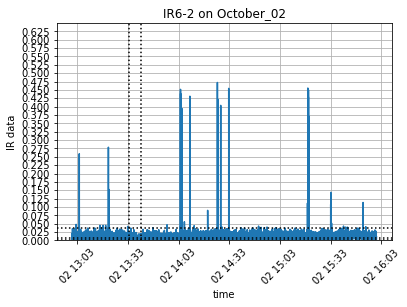

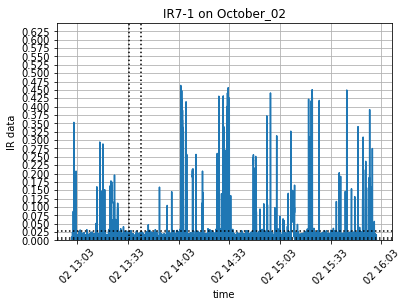

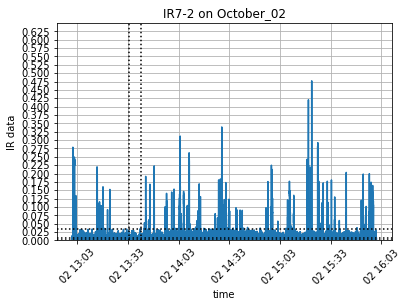

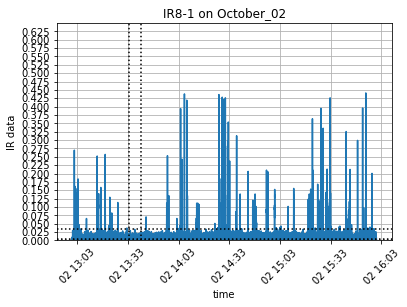

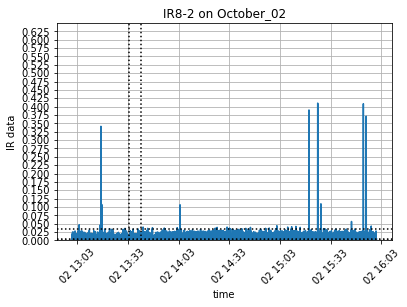

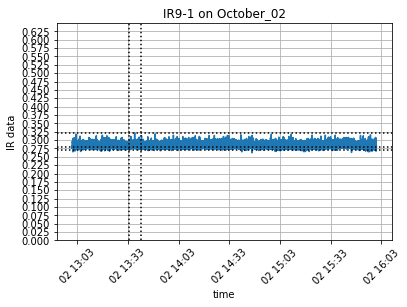

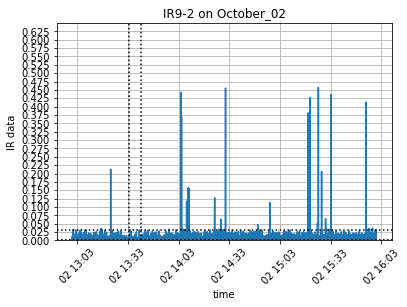

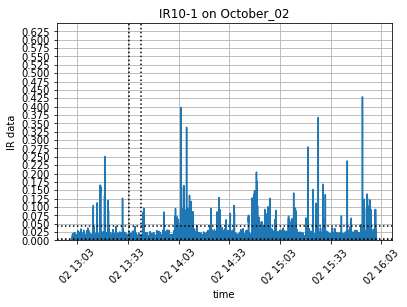

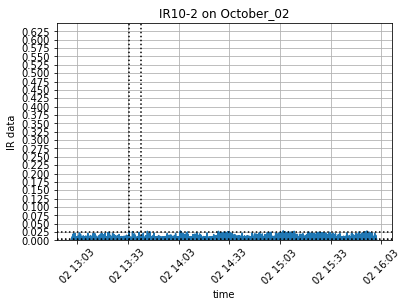

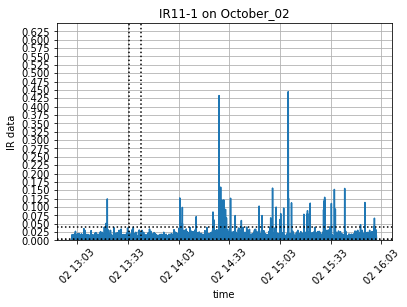

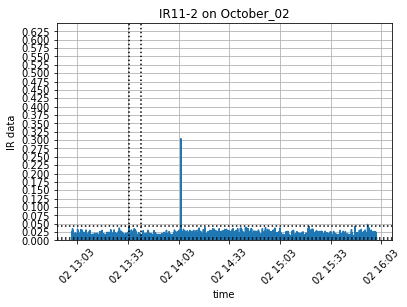

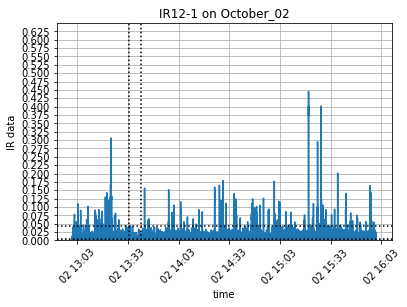

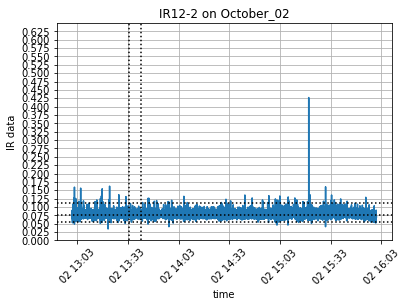

Loading: raw_sensor_data_from_master_script\13_sensor_data__October_03_2018_at_09-42-50.csv
794 steps within interval


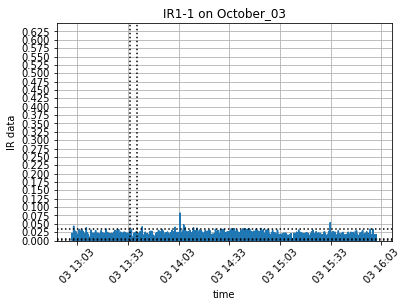

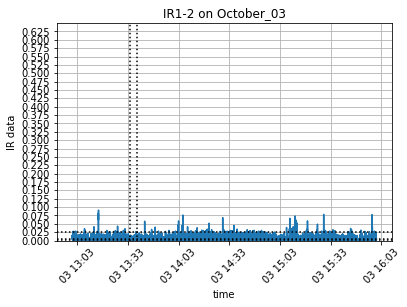

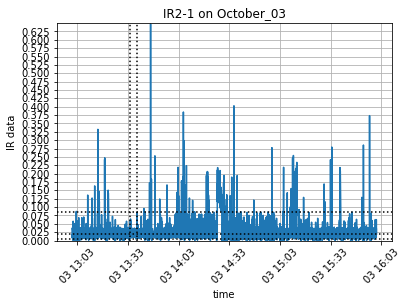

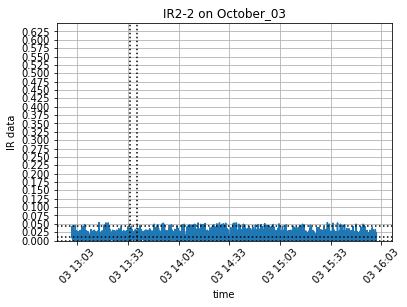

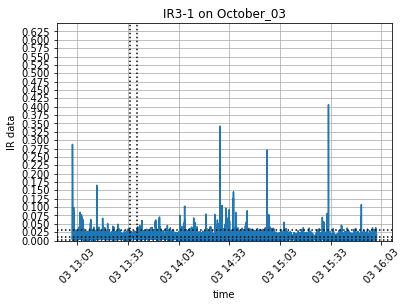

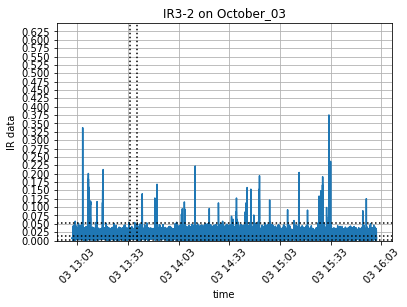

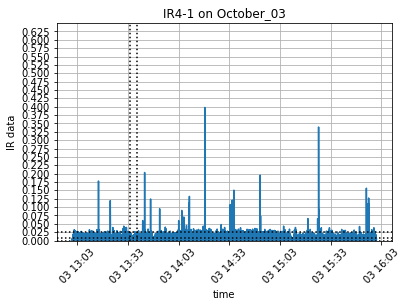

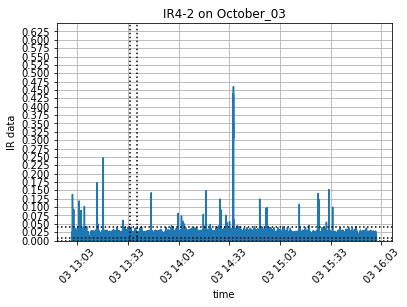

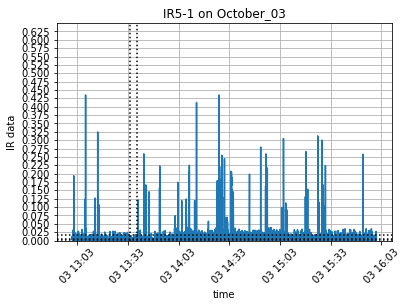

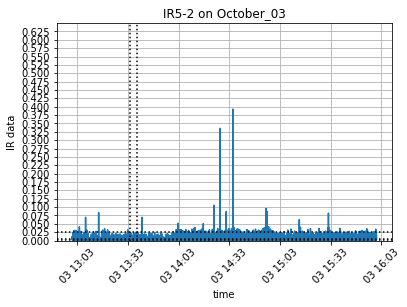

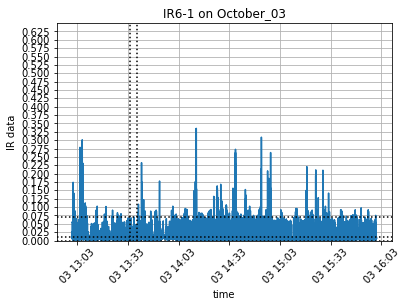

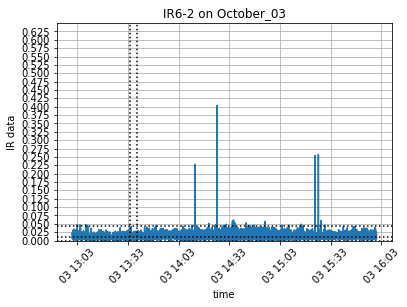

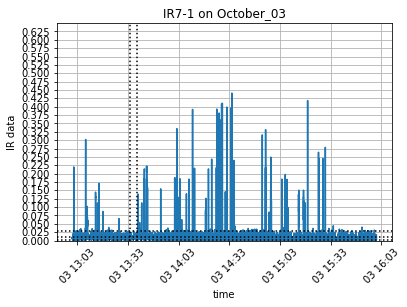

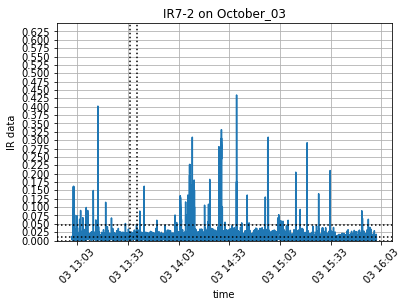

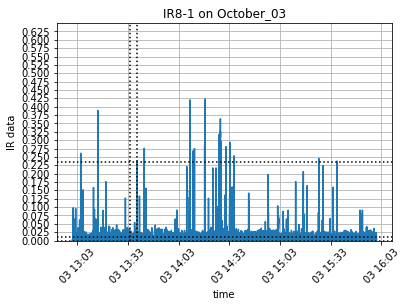

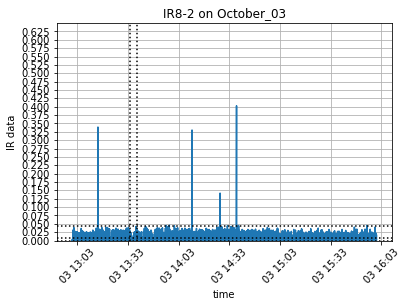

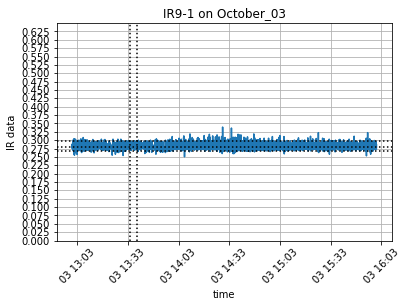

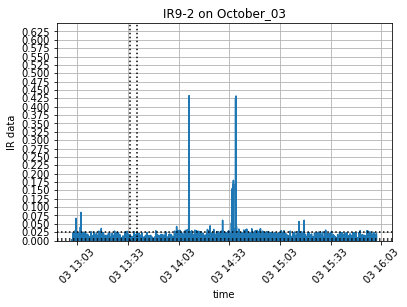

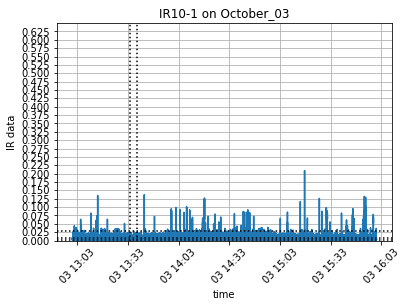

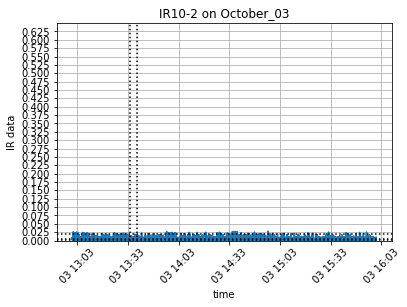

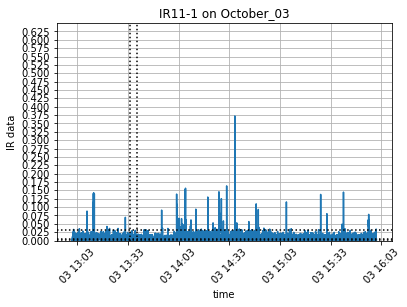

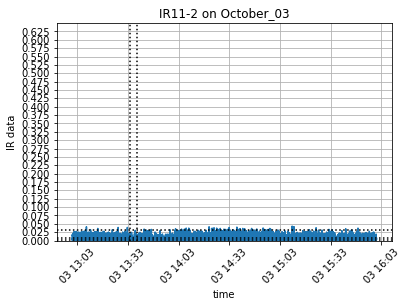

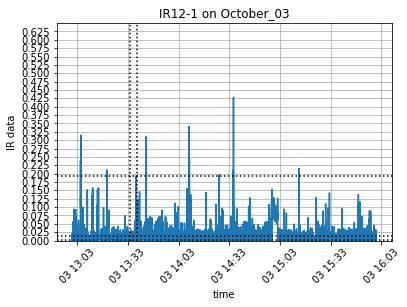

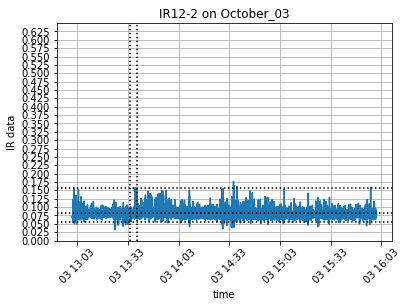

Loading: raw_sensor_data_from_master_script\14_sensor_data__October_05_2018_at_09-46-43.csv
0 steps within interval


IndexError: positional indexers are out-of-bounds

In [135]:
import glob

reference_raw_sensor_data = []

raw_sensor_data_files = glob.glob('raw_sensor_data_from_master_script/*.csv')
raw_sensor_data_files.sort()
raw_sensor_data = {}

baseline_raw_sensor_data = {}
separate_line = {}
boundary_line = {}

for file in raw_sensor_data_files:
    print('Loading: {}'.format(file))
    # 1. load sensro data
    raw_sensor_data[file] = pd.read_csv(file, skiprows=4)
    
    # 2. Get start time
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for i in range(4):
            tmp = next(reader)
            #print(tmp)
            if i == 2:
                line_with_time = tmp
    _, start_time = line_with_time[0].split(':')
    datetime_format = '%Y-%m-%d %H:%M:%S'
    start_time = float(start_time)
    start_time_datetime_format = datetime.fromtimestamp(start_time).strftime(datetime_format)
    #print('start_time_datetime_format = {}'.format(start_time_datetime_format))
    
    # 3. Convert relative time to timestamp
    raw_sensor_data[file]['timestamp'] = start_time + raw_sensor_data[file]['timestamp']
    
    # 4. Convert timestamp to readable datatime
    raw_sensor_data[file]['timestamp'] = raw_sensor_data[file]['timestamp'].apply(pd.Timestamp.fromtimestamp)
    
    
    # 5. drop last column which contain NON
    raw_sensor_data[file] = raw_sensor_data[file].drop([raw_sensor_data[file].columns[-1]], axis=1)
    
    # 6. filter out data outside [1pm, 4pm]
    date, time = start_time_datetime_format.split(' ')
    raw_sensor_data[file] = raw_sensor_data[file].loc[(raw_sensor_data[file]['timestamp'] >= date+' '+'13:00:00') & (raw_sensor_data[file]['timestamp'] <= date+' '+'16:00:00')]
    #raw_sensor_data[file] = raw_sensor_data[file].loc[(raw_sensor_data[file]['timestamp'] <= date+' '+'16:00:00')]
    
    # 7. Get data within reference interval

    date = file.split('__')[1].split('_2018')[0]
    for index, row in IR_baseline_reference_time.iterrows():
        if date == row['date']:    
            baseline_raw_sensor_data[file] = raw_sensor_data[file].loc[(raw_sensor_data[file]['timestamp'] >= row['start_time']) & (raw_sensor_data[file]['timestamp'] <= row['end_time'])]
            print("{} steps within interval".format(len(baseline_raw_sensor_data[file].index)))
            
            # get first and last timestamp of this interval
            sepa_start, sepa_end = baseline_raw_sensor_data[file]['timestamp'].iloc[[0,-1]]
            separate_line[file] = [sepa_start, sepa_end]
            
            # obtain average, upper, lower boundaries
            baseline_max = baseline_raw_sensor_data[file].drop('timestamp',axis = 1).max()
            baseline_min = baseline_raw_sensor_data[file].drop('timestamp',axis = 1).min()
            baseline_avg = baseline_raw_sensor_data[file].drop('timestamp',axis = 1).mean()
            boundary_line[file] = {'max':baseline_max, 'min':baseline_min, 'avg':baseline_avg} #  'avg':baseline_avg
            break
            
    # 8. plot each IR
    date = file.split('__')[1].split('_2018')[0]
    ymin = 0
    ymax = 0.65  # If want to spot active interaction with higher value, please change it to higher value
    ystep = 0.025
    for col in raw_sensor_data[file].columns:
        if 'IR' in col:
            plt.figure()
            plt.plot(raw_sensor_data[file]['timestamp'],raw_sensor_data[file][col])
            if file in separate_line:
                for x in separate_line[file]:
                    plt.axvline(x = x, color = 'k', linestyle=':')
            if file in boundary_line:
                for key, boundary in boundary_line[file].items():
                    plt.axhline(y = boundary[col], color = 'k', linestyle=':')
            plt.xlabel('time')
            plt.xticks(rotation = 45)
            plt.ylabel('IR data')
            plt.ylim(ymin, ymax)
            plt.yticks(np.arange(ymin,ymax,ystep))
            plt.title('{} on {}'.format(col, date))
            plt.grid(True)
            plt.show()
            
    #input("Press Enter to continue...")

In [185]:
# combine into tables
tables = {}
for key,value in boundary_line.items():
    for type_key, boundary in value.items():
        if type_key in tables:
            tables[type_key] = pd.concat([tables[type_key], boundary], axis = 1)
        else:
            tables[type_key] = boundary


In [186]:
tables['max'] = tables['max'].T
tables['max']
tables['max'].to_csv('IR_baseline_max.csv')
tables['min'] = tables['min'].T
tables['min'].to_csv('IR_baseline_min.csv')
tables['avg'] = tables['avg'].T
tables['avg'].to_csv('IR_baseline_avg.csv')

